In [1]:
import cellcharter as cc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
import scanpy as sc
import anndata as ad
import os
import json
from scipy.stats import mannwhitneyu, kruskal, ttest_ind
from statsmodels.stats.multitest import multipletests
import scikit_posthocs as sp
import warnings
warnings.filterwarnings("ignore")

/Users/lukashat/miniforge3/envs/cellcharter_scarches/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
 captum (see https://github.com/pytorch/captum).


In [2]:
extension = 'svg'
save_path = f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/paper/plots/figures/figure_6/{extension}/'
save_path_supp = f'/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/paper/plots/figures/suppl_figure_6/{extension}/'
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
adata = ad.read_h5ad("/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/results/standard/adatas/cells_final.h5ad")
with open('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/src/Paper/figure_plots/neighborhood_color_map.json', 'r') as f:
    neighborhood_color_map = json.load(f)
with open('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/src/Paper/figure_plots/phenotype_color_map.json', 'r') as f:
    phenotype_color_map = json.load(f)
with open('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/src/Paper/figure_plots/disease_color_map.json', 'r') as f:
    disease_color_map = json.load(f)
with open('/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/github/myeloma_standal/src/Paper/figure_plots/disease3_color_map.json', 'r') as f:
    disease3_color_map = json.load(f)
neighborhood_colors = [neighborhood_color_map[cat] for cat in list(adata.obs['cellcharter_CN'].cat.categories)]
neighborhood_colors = ListedColormap(neighborhood_colors)
phenotype_colors = [phenotype_color_map[cat] for cat in list(adata.obs['Phenotype4'].cat.categories)]
phenotype_colors = ListedColormap(phenotype_colors)
disease_colors = [disease_color_map[cat] for cat in list(adata.obs['disease2'].cat.categories)]
disease_colors = ListedColormap(disease_colors)
disease3_colors = [disease3_color_map[cat] for cat in list(adata.obs['disease3'].cat.categories)]
disease3_colors = ListedColormap(disease3_colors)

In [3]:
adata.obs['disease2'] = adata.obs['disease2'].astype(str)
adata = adata[adata.obs['disease2'].isin(['MM_BD', 'MM_noBD'])]
adata.obs['disease2'] = adata.obs['disease2'].astype('category')

In [4]:
df = pd.crosstab(
    index=[adata.obs['patient_ID'], adata.obs['disease2']],
    columns=adata.obs['Phenotype4'],
    normalize='index'
)
summary_stats = df.groupby(level='disease2').agg(['mean'])
summary_stats.columns = summary_stats.columns.get_level_values(0)
summary_stats = summary_stats.reindex(['MM_BD', 'MM_noBD'])
summary_stats

Phenotype4,Adipocytes,CD4 T,CD8 T,DCs,Endothelial,HLA-DR+ Macs/monos,HSPCs,MPO+,Macs/monos,Neutrophils,OB/RUNX2+,Osteoclasts,Osteocytes,PCs,Unknown
disease2,,,,,,,,,,,,,,,
MM_BD,0.015899,0.033926,0.046706,0.009728,0.025964,0.048811,0.018249,0.061157,0.038958,0.214440,0.006781,0.001410,0.005118,0.338471,0.134380
MM_noBD,0.013063,0.026229,0.052211,0.008529,0.035893,0.039537,0.021891,0.059398,0.026635,0.172278,0.005002,0.000781,0.006890,0.419055,0.112609


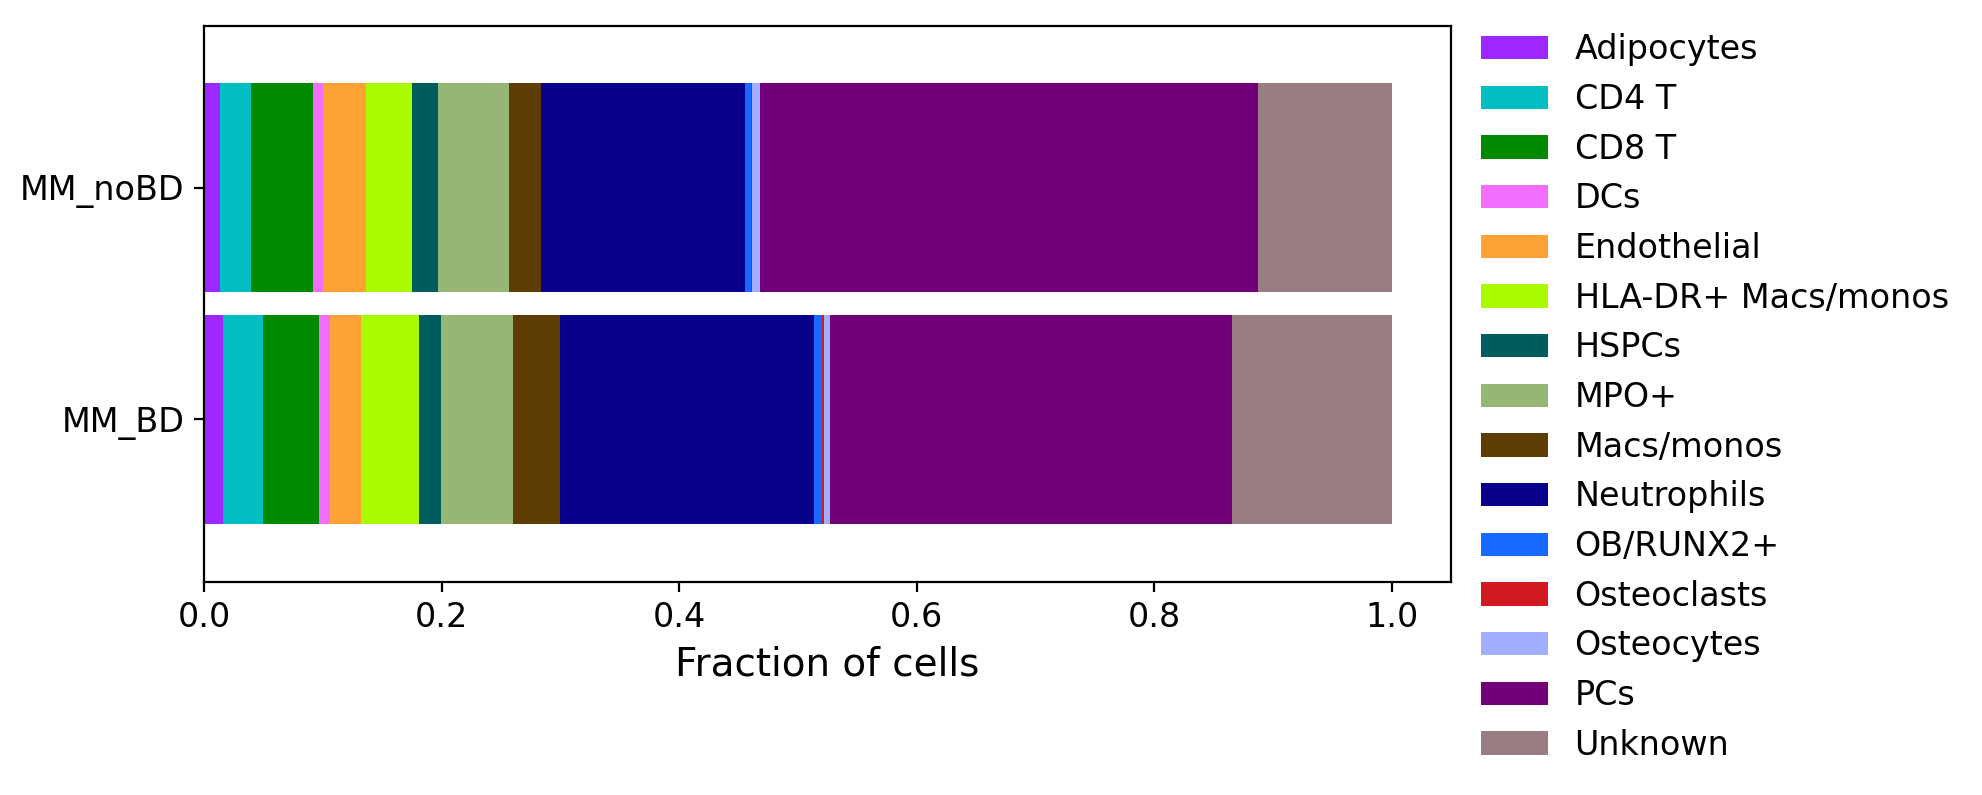

In [5]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 4))
summary_stats.plot(kind='barh', stacked=True, colormap=phenotype_colors, width = 0.9, ax=ax)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1.04), framealpha=0, facecolor='white', fontsize=12)
ax.set_ylabel('')
ax.set_xlabel('Fraction of cells', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.tight_layout()
fig.savefig(os.path.join(save_path, f"phenotype_barplot.{extension}"))

In [6]:
df = pd.crosstab(
    index=[adata.obs['image_ID'], adata.obs['disease2']],
    columns=adata.obs['cellcharter_CN'],
    normalize='index'
)
summary_stats = df.groupby(level='disease2').agg(['mean'])
summary_stats.columns = summary_stats.columns.get_level_values(0)
summary_stats = summary_stats.reindex(['MM_BD', 'MM_noBD'])
summary_stats

cellcharter_CN,ADAPTIVE_IMMUNE,ADIPOCYTES_PC,BONE_ADIPOCYTES,BONE_MYELOID,BONE_VASCULATURE,HIF1A_IMMUNE,PC_MYELOID,PC_OXPHOS,PROLIF_GLYC
disease2,,,,,,,,,
MM_BD,0.038484,0.111583,0.034200,0.110906,0.100778,0.167722,0.174237,0.119634,0.142455
MM_noBD,0.029367,0.107982,0.033594,0.093795,0.075866,0.151321,0.224063,0.143905,0.140107


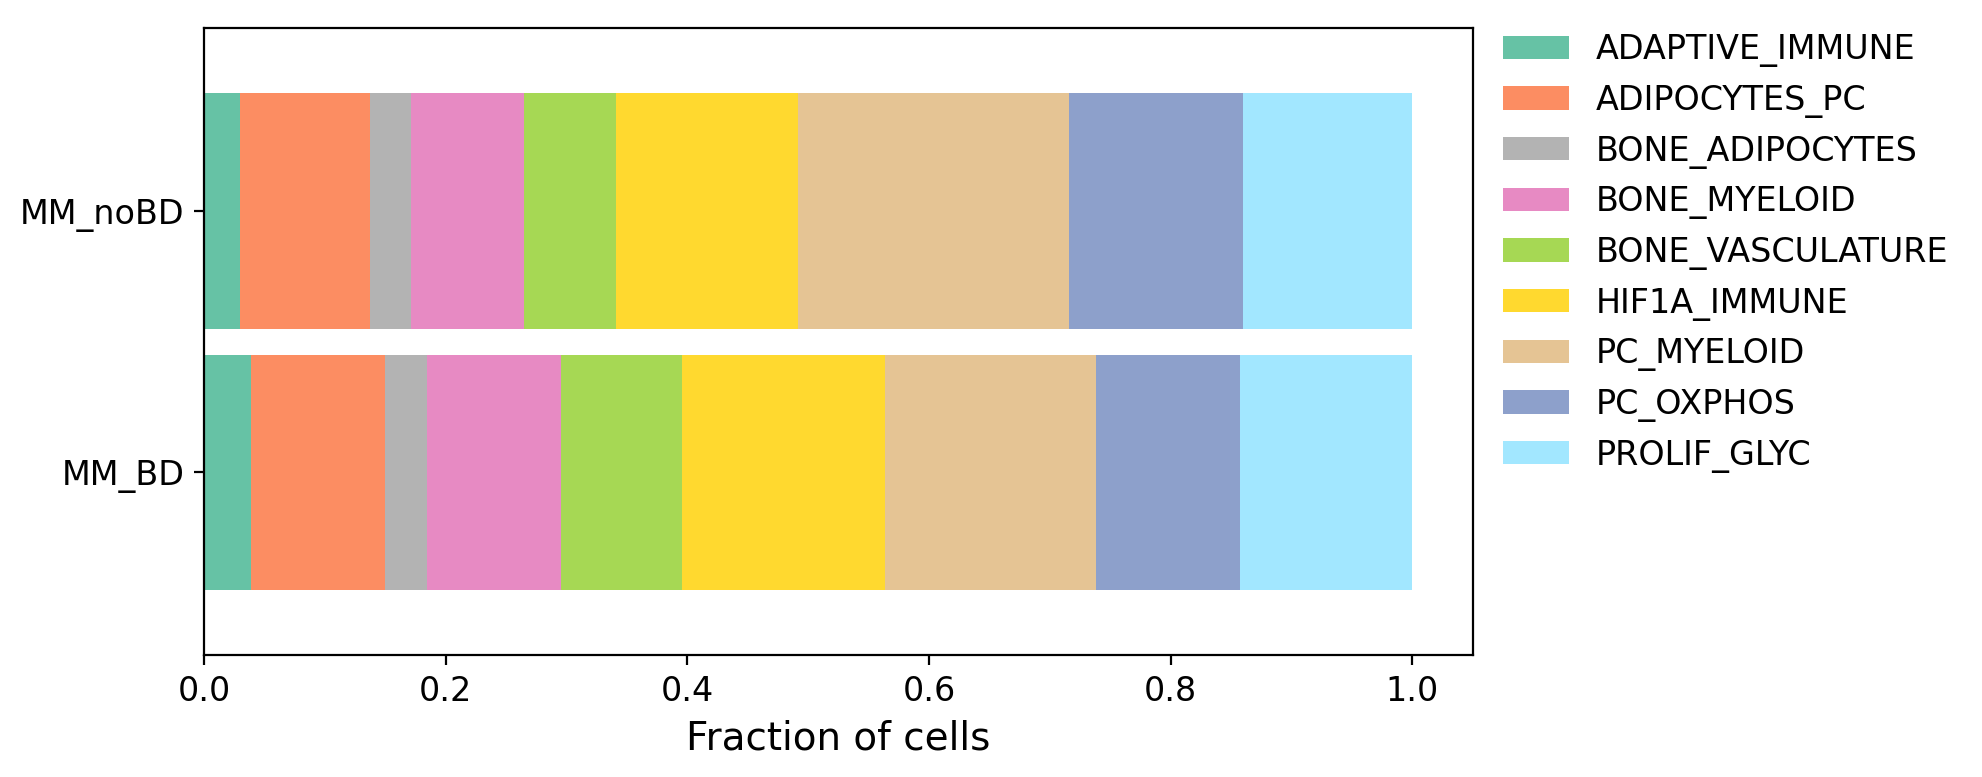

In [7]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(10, 4))
summary_stats.plot(kind='barh', stacked=True, colormap=neighborhood_colors, width = 0.9, ax=ax)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1.04), framealpha=0, facecolor='white', fontsize=12)
ax.set_ylabel('')
ax.set_xlabel('Fraction of cells', fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.tight_layout()
fig.savefig(os.path.join(save_path_supp, f"neighborhood_barplot.{extension}"))

# B

In [4]:
adata = ad.read_h5ad("/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/results/standard/adatas/cells_final.h5ad")

In [5]:
grouped_df = pd.crosstab(
    [adata.obs['image_ID'], adata.obs['disease2']], 
    adata.obs['Phenotype4'],
    normalize='index'
)
grouped_df_long = grouped_df.reset_index().melt(
    id_vars=['image_ID', 'disease2'],
    var_name='Phenotype4',
    value_name='Percentage'
)
osteoclasts_df_freq = grouped_df_long[grouped_df_long['Phenotype4'] == 'Osteoclasts']
cell_counts = (
    adata.obs.groupby(['image_ID', 'Phenotype4'])
    .size()
    .reset_index(name='count')
)

In [6]:
image_disease_map = adata.obs[['image_ID', 'disease2']].drop_duplicates().set_index('image_ID')['disease2']
osteoclasts_df = cell_counts[cell_counts['Phenotype4'] == 'Osteoclasts']
osteoclasts_df['disease2'] = osteoclasts_df['image_ID'].map(image_disease_map)
osteoblasts_df = cell_counts[cell_counts['Phenotype4'] == 'Osteoblast lineage']
osteoblasts_df['disease2'] = osteoblasts_df['image_ID'].map(image_disease_map)

In [7]:
cell_counts['disease2'] = cell_counts['image_ID'].map(image_disease_map)
pivot_df = cell_counts.pivot_table(values='count', 
                                   index=['image_ID', 'disease2'], 
                                   columns='Phenotype4', 
                                   fill_value=0).reset_index()
pivot_df = pivot_df.rename(columns={'Osteoclasts': 'Osteoclast_count', 
                                    'OB/RUNX2+': 'OB/RUNX2+_count'})

In [8]:
# boxplot with ratio of osteoblasts to osteoclasts
## filter for images with OC and OBs
pivot_df = pivot_df[(pivot_df['Osteoclast_count'] > 0) & (pivot_df['OB/RUNX2+_count'] > 0)]
pivot_df['Osteoclast_OB/RUNX2+_ratio'] = pivot_df['Osteoclast_count'] / pivot_df['OB/RUNX2+_count']
pivot_df['RUNX2+_ratio_Osteoclast_ratio'] = pivot_df['OB/RUNX2+_count'] / pivot_df['Osteoclast_count']
pivot_df

Phenotype4,image_ID,disease2,Adipocytes,CD4 T,CD8 T,DCs,Endothelial,HLA-DR+ Macs/monos,HSPCs,MPO+,Macs/monos,Neutrophils,OB/RUNX2+_count,Osteoclast_count,Osteocytes,PCs,Unknown,Osteoclast_OB/RUNX2+_ratio,RUNX2+_ratio_Osteoclast_ratio
5,TS-373_IMC03_MGUS_002.csv,MGUS,54.0,458.0,170.0,98.0,133.0,598.0,235.0,1143.0,264.0,1697.0,61.0,7.0,261.0,710.0,1213.0,0.114754,8.714286
7,TS-373_IMC04_MGUS_002.csv,MGUS,73.0,403.0,215.0,102.0,57.0,745.0,132.0,250.0,295.0,1578.0,43.0,8.0,44.0,497.0,1052.0,0.186047,5.375000
8,TS-373_IMC05_MGUS_001.csv,SMM,47.0,215.0,158.0,44.0,157.0,357.0,56.0,209.0,198.0,1245.0,33.0,5.0,13.0,702.0,1202.0,0.151515,6.600000
10,TS-373_IMC07_UB_001.csv,MM_noBD,94.0,115.0,518.0,4.0,104.0,119.0,40.0,113.0,146.0,267.0,6.0,2.0,30.0,5702.0,423.0,0.333333,3.000000
11,TS-373_IMC07_UB_002.csv,MM_noBD,104.0,48.0,689.0,1.0,175.0,205.0,35.0,82.0,132.0,321.0,8.0,3.0,2.0,7712.0,725.0,0.375000,2.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,TS-373_IMC90.1_B_001.csv,MM_BD,22.0,376.0,280.0,137.0,37.0,336.0,88.0,281.0,70.0,2049.0,24.0,1.0,6.0,2742.0,930.0,0.041667,24.000000
143,TS-373_IMC90.1_B_002.csv,MM_BD,52.0,311.0,209.0,121.0,38.0,432.0,72.0,247.0,158.0,1691.0,36.0,5.0,33.0,1524.0,537.0,0.138889,7.200000
146,TS-373_IMC93_B_001.csv,MM_BD,149.0,163.0,372.0,25.0,251.0,222.0,257.0,322.0,362.0,1335.0,61.0,4.0,38.0,1071.0,950.0,0.065574,15.250000
147,TS-373_IMC93_B_002.csv,MM_BD,136.0,72.0,300.0,15.0,181.0,67.0,180.0,286.0,307.0,958.0,37.0,13.0,49.0,2403.0,962.0,0.351351,2.846154


In [13]:
pivot_df['disease2'].value_counts()

disease2
MM_BD      74
MM_noBD    12
MGUS        3
SMM         2
Name: count, dtype: int64

Mann–Whitney U test statistic: 465.0
P-value: 0.7983398438198002


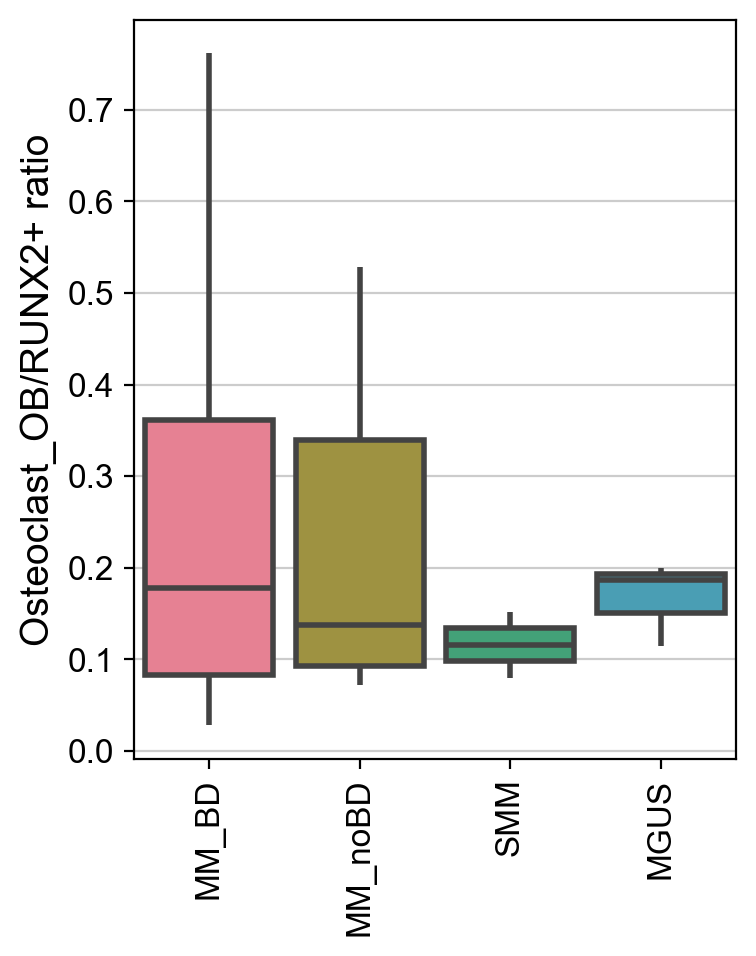

In [9]:
fig, ax = plt.subplots(figsize=(4,5))
sns.boxplot(
    data=pivot_df,
    x='disease2',
    y='Osteoclast_OB/RUNX2+_ratio',
    palette=disease_color_map,
    order=['MM_BD', 'MM_noBD', 'SMM', 'MGUS'],showcaps=False,
    linewidth=2,
    width=0.85,
    ax=ax,
    showfliers=False  # Add this line to hide outliers
)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
ax.set_ylabel('Osteoclast_OB/RUNX2+ ratio', fontsize=14)
ax.set_xlabel('')
mm_bd = pivot_df[pivot_df['disease2'] == 'MM_BD']['Osteoclast_OB/RUNX2+_ratio']
mm_no_bd = pivot_df[pivot_df['disease2'] == 'MM_noBD']['Osteoclast_OB/RUNX2+_ratio']
stat, p_value = mannwhitneyu(mm_bd, mm_no_bd, alternative='two-sided')
print("Mann–Whitney U test statistic:", stat)
print("P-value:", p_value)
plt.tight_layout()
plt.savefig(os.path.join(save_path_supp, f'osteoclast_osteoblast_ratio.{extension}'))

In [10]:
targets = ['MM_BD', 'MM_noBD', 'SMM', 'MGUS']
filtered_df = pivot_df[pivot_df['disease2'].isin(targets)]
groups = [group['Osteoclast_OB/RUNX2+_ratio'].values for _, group in filtered_df.groupby('disease2')]
kruskal_result = kruskal(*groups)
print(f"Kruskal-Wallis H-stat: {kruskal_result.statistic:.3f}, p-val: {kruskal_result.pvalue:.4f}")

Kruskal-Wallis H-stat: 0.604, p-val: 0.8956


In [15]:
osteoclasts_df

,image_ID,Phenotype4,count,disease2
11,TS-373_IMC01_UB_001.csv,Osteoclasts,0,MM_noBD
26,TS-373_IMC01_UB_002.csv,Osteoclasts,0,MM_noBD
41,TS-373_IMC02_MGUS_001.csv,Osteoclasts,0,MGUS
56,TS-373_IMC02_MGUS_002.csv,Osteoclasts,0,MGUS
71,TS-373_IMC03_MGUS_001.csv,Osteoclasts,0,MGUS
...,...,...,...,...
2216,TS-373_IMC93_B_002.csv,Osteoclasts,13,MM_BD
2231,TS-373_IMC95_B_001.csv,Osteoclasts,0,MM_BD
2246,TS-373_IMC95_B_002.csv,Osteoclasts,0,MM_BD
2261,TS-373_IMC96_B_001.csv,Osteoclasts,0,MM_BD


In [16]:
osteoclasts_df = cell_counts[cell_counts['Phenotype4'] == 'Osteoclasts']

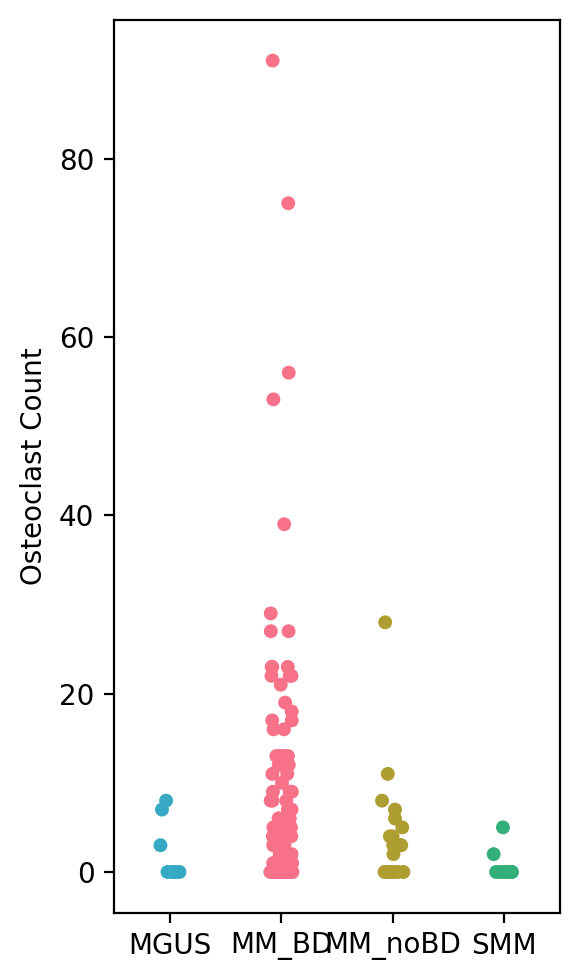

In [17]:
fig, ax = plt.subplots(figsize=(3,5))
sns.stripplot(data=osteoclasts_df, x='disease2', y='count', palette=disease_color_map, ax= ax)
plt.ylabel('Osteoclast Count')
plt.xlabel('')
plt.tight_layout()
plt.savefig(os.path.join(save_path, f'osteoclast_count.{extension}'))

In [18]:
bd = osteoclasts_df[osteoclasts_df['disease2'] == 'MM_BD']['count']
no_bd = osteoclasts_df[osteoclasts_df['disease2'] == 'MM_noBD']['count']
stat, p_value = mannwhitneyu(bd, no_bd, alternative='two-sided')
print("Mann–Whitney U test statistic:", stat, ",p-value:", p_value)

Mann–Whitney U test statistic: 1284.5 ,p-value: 0.2256002122866001


In [19]:
ob_df = cell_counts[cell_counts['Phenotype4'] == 'OB/RUNX2+']

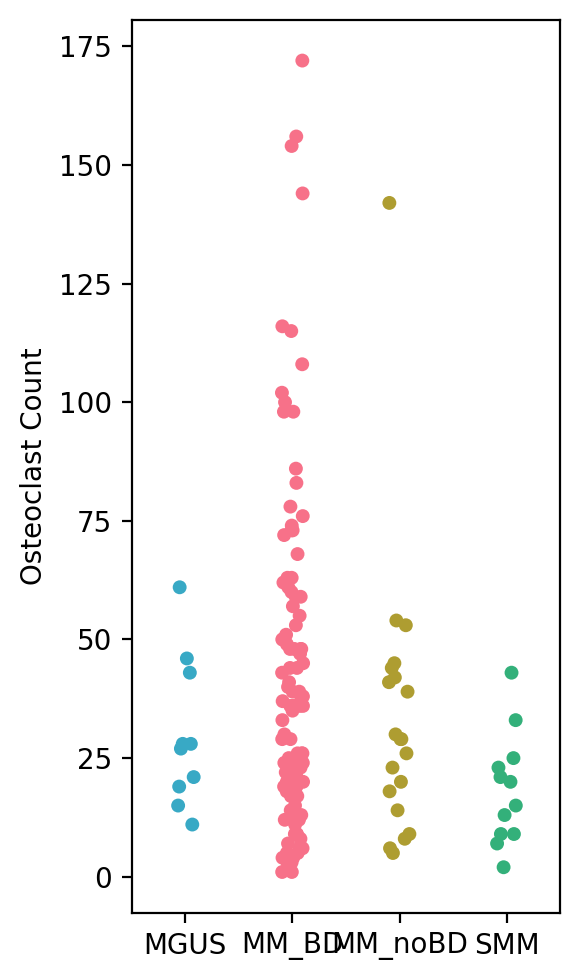

In [20]:
fig, ax = plt.subplots(figsize=(3,5))
sns.stripplot(data=ob_df, x='disease2', y='count', palette=disease_color_map, ax= ax)
plt.ylabel('Osteoclast Count')
plt.xlabel('')
plt.tight_layout()
plt.savefig(os.path.join(save_path_supp, f'osteoblast_count.{extension}'))

In [21]:
bd = ob_df[ob_df['disease2'] == 'MM_BD']['count']
no_bd = ob_df[ob_df['disease2'] == 'MM_noBD']['count']
stat, p_value = mannwhitneyu(bd, no_bd, alternative='two-sided')
print("Mann–Whitney U test statistic:", stat, ",p-value:", p_value)

Mann–Whitney U test statistic: 1218.0 ,p-value: 0.4482462388008026


# OB proliferation

In [22]:
adata_thresholds = ad.read_h5ad("/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/results/standard/adatas/cells_thresholds_scanorama.h5ad")
adata_all = ad.read_h5ad("/Users/lukashat/Documents/PhD_Schapiro/Projects/Myeloma_Standal/results/standard/adatas/cells_final.h5ad")
adata_thresholds.obs

,Object,area,Y_centroid,X_centroid,axis_major_length,axis_minor_length,eccentricity,distance_to_bone,Phenotype,image_ID,...,Phenotype3,cellcharter_CN,Ki67_counts,IDO_counts,GranzymeB_counts,GranzymeK_counts,CD68_counts,HLA-DR_counts,IRF4_counts,Phenotype4
Object 1 in TS-373_IMC77_B_001.csv,1,16,0.562500,801.750000,8.430760,2.420699,0.957893,26.019224,Unknown,TS-373_IMC77_B_001.csv,...,Plasma Cells/MM cells,stroma_adipocyte,0,0,0,0,0,0,0,Plasma Cells/MM cells
Object 2 in TS-373_IMC77_B_001.csv,2,12,0.833333,859.583333,5.176698,2.940449,0.823017,84.005952,Unknown,TS-373_IMC77_B_001.csv,...,Unknown,bone,1,0,1,0,0,0,0,Unknown
Object 3 in TS-373_IMC77_B_001.csv,3,13,0.846154,34.000000,5.203549,3.076923,0.806443,123.405835,Neutrophils,TS-373_IMC77_B_001.csv,...,Neutrophils,hypoxic_immune,0,0,0,0,0,0,0,Neutrophils
Object 4 in TS-373_IMC77_B_001.csv,4,9,1.000000,42.000000,3.265986,3.265986,0.000000,118.713942,Unknown,TS-373_IMC77_B_001.csv,...,Unknown,stroma_adipocyte,0,0,0,0,0,0,0,Unknown
Object 5 in TS-373_IMC77_B_001.csv,5,23,1.478261,57.565217,8.151264,3.901335,0.878024,110.476242,Unknown,TS-373_IMC77_B_001.csv,...,Unknown,pc_myeloid,1,0,0,0,0,0,0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Object 6622 in TS-373_IMC83_B_001.csv,6622,11,998.000000,883.545455,4.077022,3.677860,0.431538,250.503493,Neutrophils,TS-373_IMC83_B_001.csv,...,Neutrophils,hypoxic_immune,1,1,1,1,1,0,0,Neutrophils
Object 6623 in TS-373_IMC83_B_001.csv,6623,27,997.407407,978.703704,7.171071,5.069573,0.707266,327.273586,CD4+Tcells,TS-373_IMC83_B_001.csv,...,CD4+Tcells,pc_myeloid,0,0,1,0,1,0,0,CD4+Tcells
Object 6624 in TS-373_IMC83_B_001.csv,6624,25,997.640000,996.320000,7.554137,4.235920,0.827991,342.067245,Neutrophils,TS-373_IMC83_B_001.csv,...,Neutrophils,bone_myeloid,1,0,1,0,1,0,0,Neutrophils
Object 6625 in TS-373_IMC83_B_001.csv,6625,13,997.692308,820.153846,5.547002,3.412473,0.788377,195.256242,activated Macrophages/Monocytes,TS-373_IMC83_B_001.csv,...,activated Macrophages/Monocytes,pc_myeloid,1,0,1,1,1,1,0,activated Macrophages/Monocytes


In [23]:
adata_all.obs['Ki67_counts'] = adata_all.obs.index.map(adata_thresholds.obs['Ki67_counts'])
adata_all.obs['proliferating_cells'] =  adata_all.obs['Phenotype4'].astype(str) + '_' + adata_all.obs['Ki67_counts'].astype(str)
adata_all.obs

,Object,area,Y_centroid,X_centroid,axis_major_length,axis_minor_length,eccentricity,distance_to_bone,image_ID,disease,patient_ID,ROI,disease2,distance_to_bone_corrected,cellcharter_CN,Phenotype4,HistoneH3,disease3,Ki67_counts,proliferating_cells
Object 1 in TS-373_IMC77_B_001.csv,1,16,0.562500,801.750000,8.430760,2.420699,0.957893,26.019224,TS-373_IMC77_B_001.csv,MM_BD,IMC77,001,MM_BD,26.019224,ADIPOCYTES_PC,PCs,4.374106,MM,0,PCs_0
Object 2 in TS-373_IMC77_B_001.csv,2,12,0.833333,859.583333,5.176698,2.940449,0.823017,84.005952,TS-373_IMC77_B_001.csv,MM_BD,IMC77,001,MM_BD,84.005952,BONE_ADIPOCYTES,Unknown,3.578988,MM,1,Unknown_1
Object 3 in TS-373_IMC77_B_001.csv,3,13,0.846154,34.000000,5.203549,3.076923,0.806443,123.405835,TS-373_IMC77_B_001.csv,MM_BD,IMC77,001,MM_BD,123.405835,HIF1A_IMMUNE,Neutrophils,2.832795,MM,0,Neutrophils_0
Object 4 in TS-373_IMC77_B_001.csv,4,9,1.000000,42.000000,3.265986,3.265986,0.000000,118.713942,TS-373_IMC77_B_001.csv,MM_BD,IMC77,001,MM_BD,118.713942,ADIPOCYTES_PC,Unknown,2.353134,MM,0,Unknown_0
Object 5 in TS-373_IMC77_B_001.csv,5,23,1.478261,57.565217,8.151264,3.901335,0.878024,110.476242,TS-373_IMC77_B_001.csv,MM_BD,IMC77,001,MM_BD,110.476242,PC_MYELOID,Unknown,3.813037,MM,1,Unknown_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Object 6622 in TS-373_IMC83_B_001.csv,6622,11,998.000000,883.545455,4.077022,3.677860,0.431538,250.503493,TS-373_IMC83_B_001.csv,MM_BD,IMC83,001,MM_BD,250.503493,HIF1A_IMMUNE,Neutrophils,4.890736,MM,1,Neutrophils_1
Object 6623 in TS-373_IMC83_B_001.csv,6623,27,997.407407,978.703704,7.171071,5.069573,0.707266,327.273586,TS-373_IMC83_B_001.csv,MM_BD,IMC83,001,MM_BD,327.273586,PC_MYELOID,CD4 T,4.770726,MM,0,CD4 T_0
Object 6624 in TS-373_IMC83_B_001.csv,6624,25,997.640000,996.320000,7.554137,4.235920,0.827991,342.067245,TS-373_IMC83_B_001.csv,MM_BD,IMC83,001,MM_BD,342.067245,BONE_MYELOID,Neutrophils,5.153814,MM,1,Neutrophils_1
Object 6625 in TS-373_IMC83_B_001.csv,6625,13,997.692308,820.153846,5.547002,3.412473,0.788377,195.256242,TS-373_IMC83_B_001.csv,MM_BD,IMC83,001,MM_BD,195.256242,PC_MYELOID,HLA-DR+ Macs/monos,4.905291,MM,1,HLA-DR+ Macs/monos_1


In [24]:
df = pd.crosstab(
    index=[adata_all.obs['image_ID'], adata_all.obs['disease2']],
    columns=adata_all.obs['proliferating_cells'],
    normalize='index'
)
df

,proliferating_cells,Adipocytes_0,Adipocytes_1,CD4 T_0,CD4 T_1,CD8 T_0,CD8 T_1,DCs_0,DCs_1,Endothelial_0,Endothelial_1,...,OB/RUNX2+_0,OB/RUNX2+_1,Osteoclasts_0,Osteoclasts_1,Osteocytes_0,Osteocytes_1,PCs_0,PCs_1,Unknown_0,Unknown_1
image_ID,disease2,,,,,,,,,,,,,,,,,,,,,
TS-373_IMC01_UB_001.csv,MM_noBD,0.004724,0.003070,0.010628,0.003307,0.017950,0.011337,0.006613,0.003779,0.016769,0.005905,...,0.002598,0.001653,0.000000,0.000000,0.020076,0.004960,0.115966,0.033302,0.015352,0.166509
TS-373_IMC01_UB_002.csv,MM_noBD,0.009964,0.002264,0.019475,0.006341,0.028986,0.010643,0.028759,0.007699,0.018795,0.006793,...,0.001359,0.000679,0.000000,0.000000,0.012455,0.001359,0.168705,0.044384,0.031024,0.164176
TS-373_IMC02_MGUS_001.csv,MGUS,0.002975,0.005168,0.011275,0.004541,0.026308,0.015503,0.006577,0.002975,0.005168,0.004228,...,0.002819,0.001566,0.000000,0.000000,0.000000,0.000000,0.099906,0.050110,0.026151,0.341372
TS-373_IMC02_MGUS_002.csv,MGUS,0.002903,0.008088,0.013273,0.003111,0.020116,0.011613,0.012028,0.004977,0.013065,0.005185,...,0.003111,0.001244,0.000000,0.000000,0.043965,0.020531,0.083783,0.042721,0.032974,0.286810
TS-373_IMC03_MGUS_001.csv,MGUS,0.006408,0.002603,0.020425,0.011614,0.017221,0.010212,0.002203,0.002002,0.006408,0.004205,...,0.003204,0.002203,0.000000,0.000000,0.058070,0.023228,0.084902,0.021225,0.038046,0.180617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TS-373_IMC93_B_002.csv,MM_BD,0.004861,0.017935,0.007543,0.004526,0.032350,0.017935,0.001173,0.001341,0.017935,0.012404,...,0.004190,0.002011,0.001844,0.000335,0.007710,0.000503,0.241703,0.161079,0.013242,0.148005
TS-373_IMC95_B_001.csv,MM_BD,0.018677,0.002025,0.002475,0.000900,0.004050,0.000225,0.000225,0.000225,0.006526,0.001575,...,0.001125,0.000000,0.000000,0.000000,0.003150,0.000000,0.027003,0.004050,0.112061,0.065032
TS-373_IMC95_B_002.csv,MM_BD,0.005121,0.000749,0.000125,0.000000,0.001624,0.000125,0.000125,0.000000,0.001124,0.000500,...,0.000250,0.000250,0.000000,0.000000,0.000000,0.000000,0.013365,0.002373,0.109043,0.100300


In [25]:
df = df[['OB/RUNX2+_0', 'OB/RUNX2+_1']]
df['OB/RUNX2+_proliferation_ratio'] = df['OB/RUNX2+_1'] / (df['OB/RUNX2+_0'] + df['OB/RUNX2+_1'])
df 

,proliferating_cells,OB/RUNX2+_0,OB/RUNX2+_1,OB/RUNX2+_proliferation_ratio
image_ID,disease2,,,
TS-373_IMC01_UB_001.csv,MM_noBD,0.002598,0.001653,0.388889
TS-373_IMC01_UB_002.csv,MM_noBD,0.001359,0.000679,0.333333
TS-373_IMC02_MGUS_001.csv,MGUS,0.002819,0.001566,0.357143
TS-373_IMC02_MGUS_002.csv,MGUS,0.003111,0.001244,0.285714
TS-373_IMC03_MGUS_001.csv,MGUS,0.003204,0.002203,0.407407
...,...,...,...,...
TS-373_IMC93_B_002.csv,MM_BD,0.004190,0.002011,0.324324
TS-373_IMC95_B_001.csv,MM_BD,0.001125,0.000000,0.000000
TS-373_IMC95_B_002.csv,MM_BD,0.000250,0.000250,0.500000


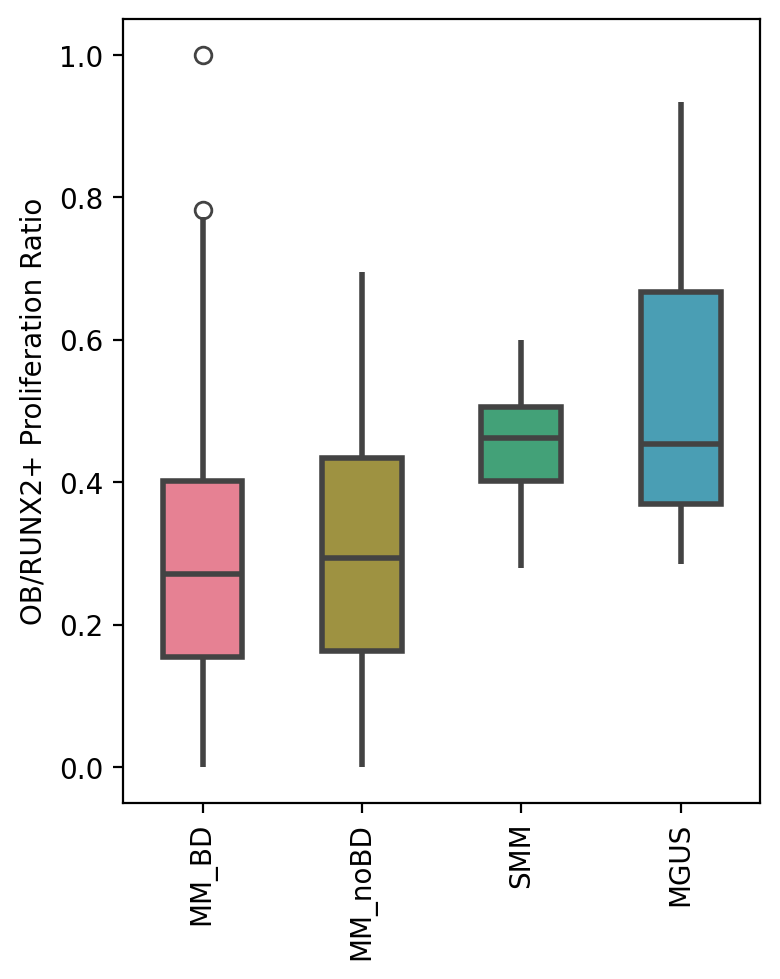

In [26]:
fig, ax = plt.subplots(figsize=(4, 5))
sns.boxplot(data=df.reset_index(), x='disease2', y='OB/RUNX2+_proliferation_ratio', order=['MM_BD', 'MM_noBD', 'SMM', 'MGUS'], palette=disease_color_map, ax=ax, showcaps=False, linewidth=2, width=0.5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xlabel('')
ax.set_ylabel('OB/RUNX2+ Proliferation Ratio')
plt.tight_layout()
plt.savefig(os.path.join(save_path, f'ob_proliferation_index.{extension}'))

In [27]:
targets = ['MM_BD', 'MM_noBD', 'SMM', 'MGUS']
df_reset = df.reset_index()
filtered_df = df_reset[df_reset['disease2'].isin(targets)]
groups = [group['OB/RUNX2+_proliferation_ratio'].values for _, group in filtered_df.groupby('disease2')]
kruskal_result = kruskal(*groups)
print(f"Kruskal-Wallis H-stat: {kruskal_result.statistic:.3f}, p-val: {kruskal_result.pvalue:.4f}")

Kruskal-Wallis H-stat: 16.786, p-val: 0.0008


In [28]:
dunn_results = sp.posthoc_dunn(
    filtered_df,
    val_col='OB/RUNX2+_proliferation_ratio',
    group_col='disease2',
    p_adjust='bonferroni'
)
print("\nDunn's posthoc results:")
dunn_results


Dunn's posthoc results:


,MGUS,MM_BD,MM_noBD,SMM
MGUS,1.000000,0.015435,0.107612,1.000000
MM_BD,0.015435,1.000000,1.000000,0.015359
MM_noBD,0.107612,1.000000,1.000000,0.130455
SMM,1.000000,0.015359,0.130455,1.000000


# C

In [29]:
adata.obs['disease2'] = adata.obs['disease2'].astype(str)
adata = adata[adata.obs['disease2'].isin(['MM_BD', 'MM_noBD'])]
adata.obs['disease2'] = adata.obs['disease2'].astype('category')

## Distance all pcs in nbh

In [30]:
disease_mapping = adata.obs[['disease2', 'image_ID']].drop_duplicates()
disease_mapping.set_index('image_ID', inplace=True)
df = adata[adata.obs['Phenotype4'] == 'PCs'].obs[['distance_to_bone_corrected', 'image_ID', 'cellcharter_CN']]
df = df.groupby(['image_ID', 'cellcharter_CN']).median()
df.reset_index(inplace=True)
df['disease2'] = df['image_ID'].map(disease_mapping['disease2'])
df.dropna(inplace=True)

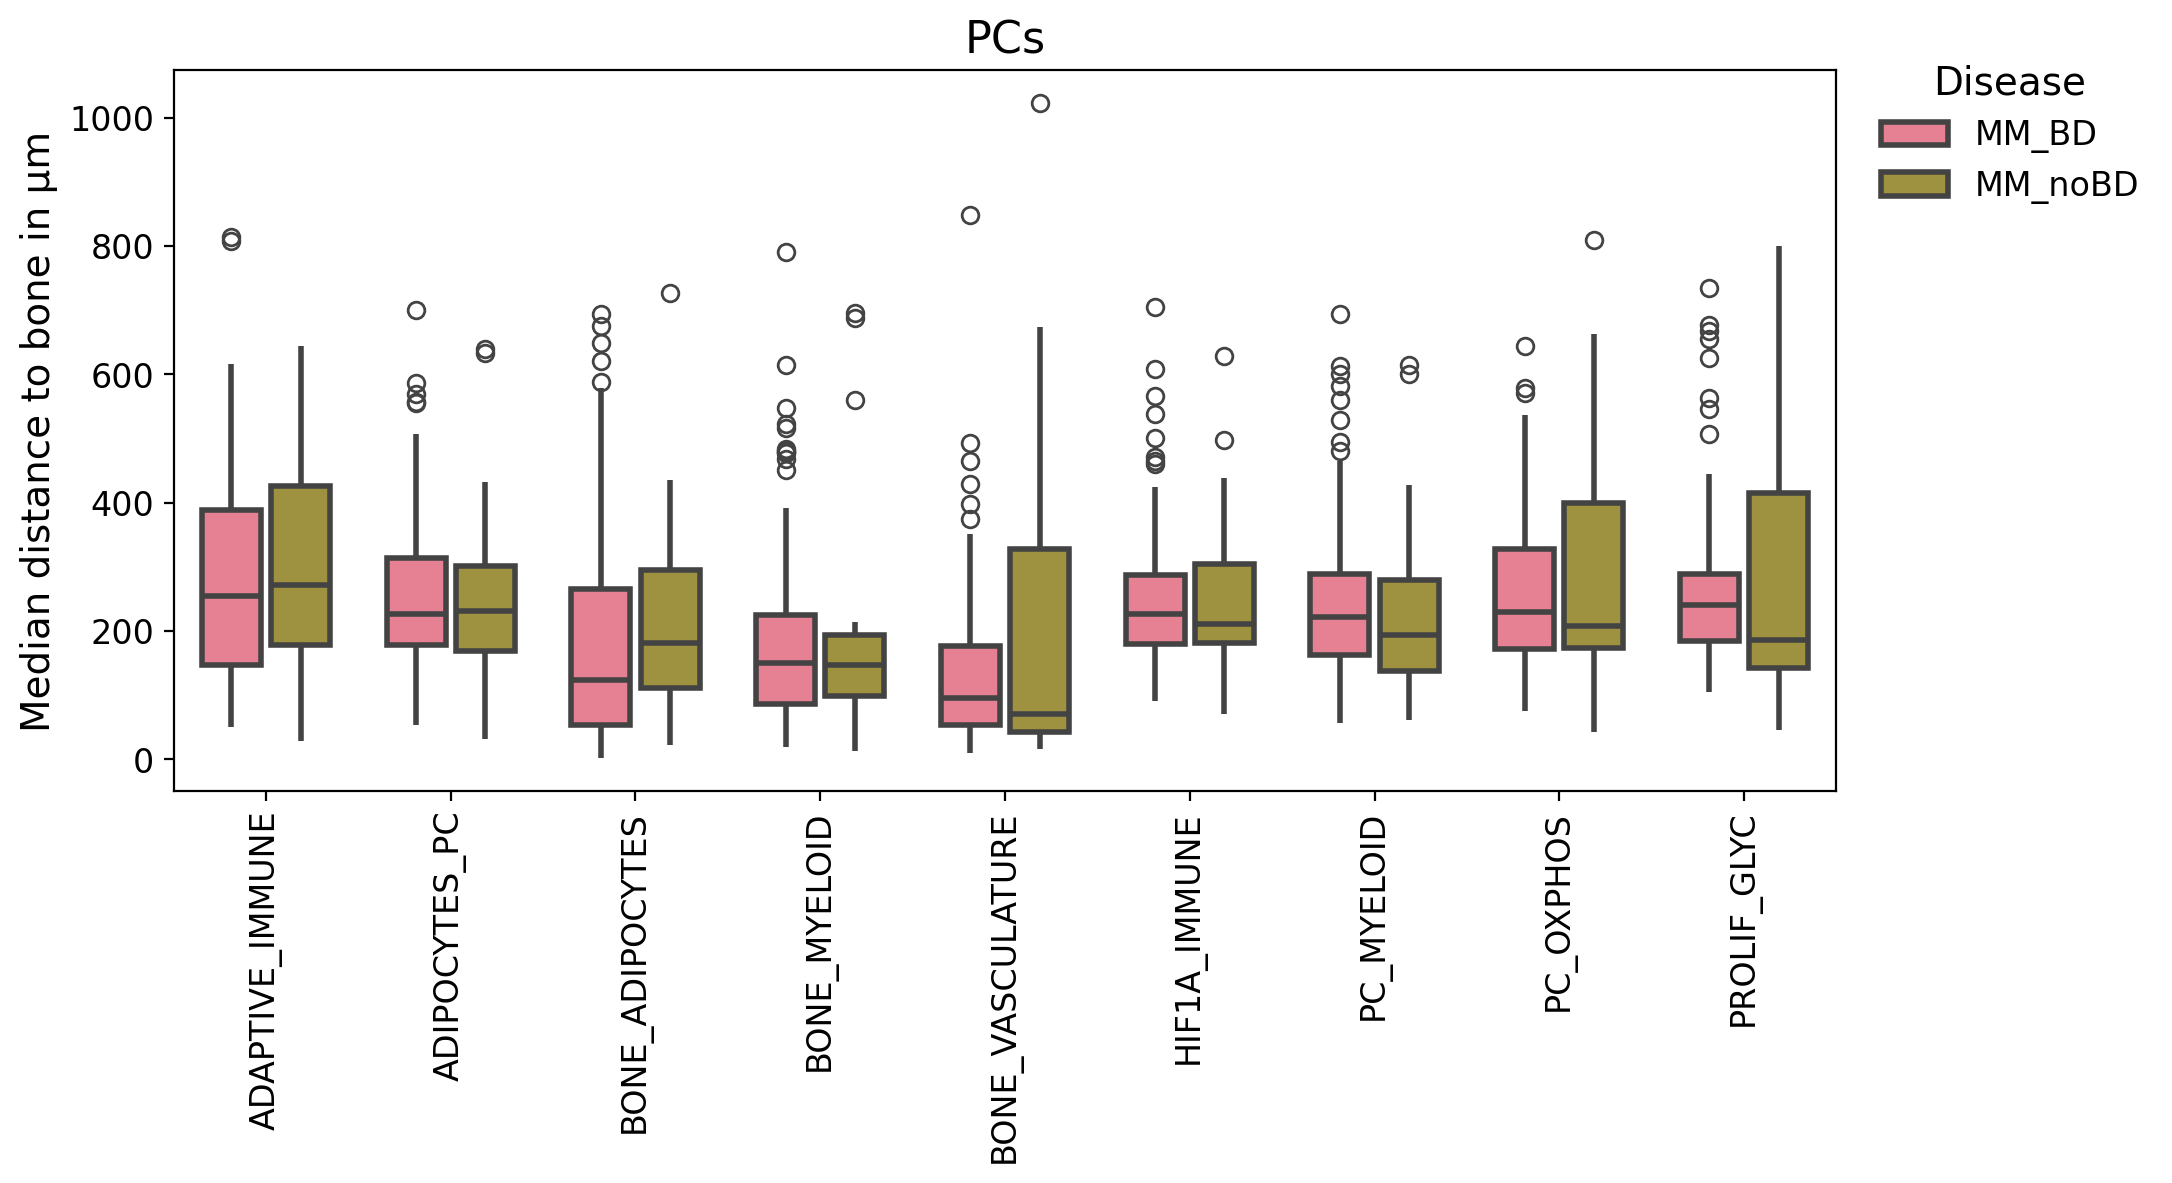

In [31]:
fig, ax = plt.subplots(figsize=(11, 6))
sns.boxplot(data=df, x='cellcharter_CN', y='distance_to_bone_corrected', hue='disease2', palette=disease_color_map, ax=ax, showcaps=False, linewidth=2, width=0.75, gap=0.15)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('Median distance to bone in µm', fontsize=14)
plt.title('PCs', fontsize=16)
plt.legend(title='Disease', fontsize=12, title_fontsize=14, loc='upper right', framealpha=0, bbox_to_anchor=(1.2, 1.05)) 
plt.tight_layout()
plt.savefig(os.path.join(save_path_supp, f'median_distance_to_bone_nbh_pcs.{extension}'))

In [32]:
h_stat, p_val = kruskal(*[group['distance_to_bone_corrected'] 
                              for _, group in df.groupby(['cellcharter_CN', 'disease2'])])
print(f"Kruskal-Wallis H-stat: {h_stat:.3f}, p-val: {p_val:.4f}")

Kruskal-Wallis H-stat: 157.786, p-val: 0.0000


In [33]:
results = []

# Iterate through each unique neighborhood
for neighborhood in df['cellcharter_CN'].unique():
    # Filter data for current neighborhood
    nhood_data = df[df['cellcharter_CN'] == neighborhood]
    
    # Split by disease type
    mm_bd = nhood_data[nhood_data['disease2'] == 'MM_BD']['distance_to_bone_corrected']
    mm_no_bd = nhood_data[nhood_data['disease2'] == 'MM_noBD']['distance_to_bone_corrected']
    
    # Only test if both groups have data
    if len(mm_bd) > 0 and len(mm_no_bd) > 0:
        stat, pval = mannwhitneyu(mm_bd, mm_no_bd, alternative='two-sided')
        results.append({
            'Neighborhood': neighborhood,
            'Statistic': stat,
            'P-Value': pval,
            'MM_BD_n': len(mm_bd),
            'MM_noBD_n': len(mm_no_bd)
        })

# Create results dataframe
results_df = pd.DataFrame(results)
results_df['Adj_P-Value'] = multipletests(results_df['P-Value'], method='fdr_bh')[1]

In [34]:
results_df

,Neighborhood,Statistic,P-Value,MM_BD_n,MM_noBD_n,Adj_P-Value
0,ADAPTIVE_IMMUNE,747.0,0.814431,97,16,1.0
1,ADIPOCYTES_PC,807.0,0.958496,100,16,1.0
2,BONE_ADIPOCYTES,632.5,0.181199,100,16,1.0
3,BONE_MYELOID,794.0,0.964876,100,16,1.0
4,BONE_VASCULATURE,800.0,1.000000,100,16,1.0
5,HIF1A_IMMUNE,823.0,0.857039,100,16,1.0
6,PC_MYELOID,860.0,0.585416,99,16,1.0
7,PC_OXPHOS,780.0,0.977222,98,16,1.0
8,PROLIF_GLYC,887.0,0.488589,100,16,1.0


In [35]:
disease_mapping = adata.obs[['disease2', 'image_ID']].drop_duplicates()
disease_mapping.set_index('image_ID', inplace=True)
df = adata[adata.obs['Phenotype4'] == 'PCs'].obs[['distance_to_bone_corrected', 'image_ID']]
df = df.groupby(['image_ID']).median()
df.reset_index(inplace=True)
df['disease2'] = df['image_ID'].map(disease_mapping['disease2'])
df.dropna(inplace=True)
df

,image_ID,distance_to_bone_corrected,disease2
0,TS-373_IMC01_UB_001.csv,45.287919,MM_noBD
1,TS-373_IMC01_UB_002.csv,118.511603,MM_noBD
2,TS-373_IMC07_UB_001.csv,198.018938,MM_noBD
3,TS-373_IMC07_UB_002.csv,643.579830,MM_noBD
4,TS-373_IMC08_UB_001.csv,164.560019,MM_BD
...,...,...,...
122,TS-373_IMC92_B_001.csv,206.603485,MM_BD
124,TS-373_IMC93_B_001.csv,334.215499,MM_BD
125,TS-373_IMC93_B_002.csv,308.690784,MM_BD
126,TS-373_IMC95_B_001.csv,323.702704,MM_BD


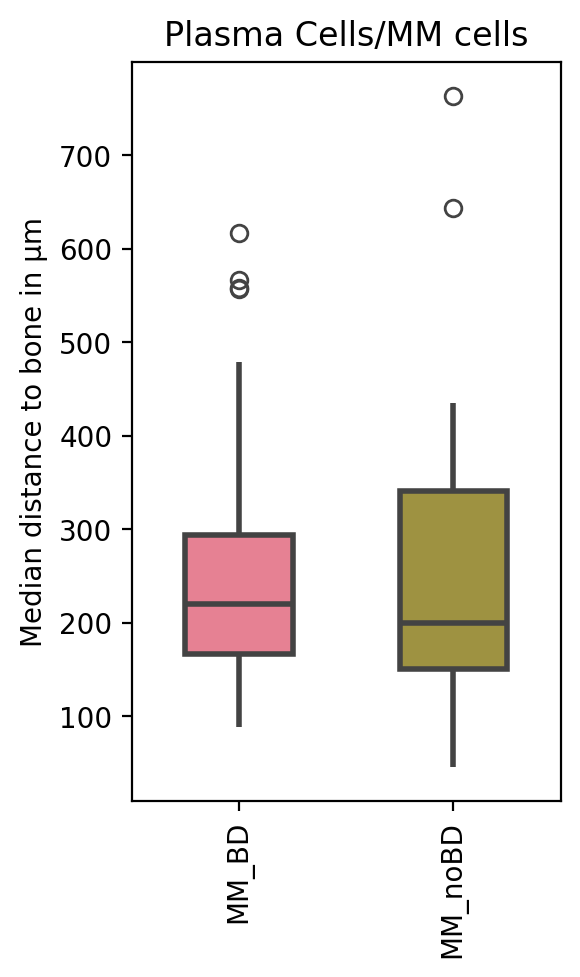

In [36]:
fig, ax = plt.subplots(figsize=(3, 5))
sns.boxplot(data=df, x='disease2', y='distance_to_bone_corrected', palette=disease_color_map, ax=ax, showcaps=False, linewidth=2, width=0.5)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Median distance to bone in µm')
plt.title('Plasma Cells/MM cells')
plt.tight_layout()
plt.savefig(os.path.join(save_path_supp, f'median_distance_to_bone_all_pcs.{extension}'))

In [37]:
bd = df[df['disease2'] == 'MM_BD']['distance_to_bone_corrected']
no_bd = df[df['disease2'] == 'MM_noBD']['distance_to_bone_corrected']
stat, p_value = mannwhitneyu(bd, no_bd, alternative='two-sided')
print("Mann–Whitney U test statistic:", stat, ",p-value:", p_value)

Mann–Whitney U test statistic: 849.0 ,p-value: 0.6977860658693749


In [38]:
## Distance to bone connected components

In [39]:
adata_cc = adata.copy()
cc.gr.connected_components(adata_cc, cluster_key='cellcharter_CN', min_cells=60)
adata_cc = adata_cc[~adata_cc.obs['component'].isna()]
adata_cc = adata_cc[~adata_cc.obs['distance_to_bone_corrected'].isna()]

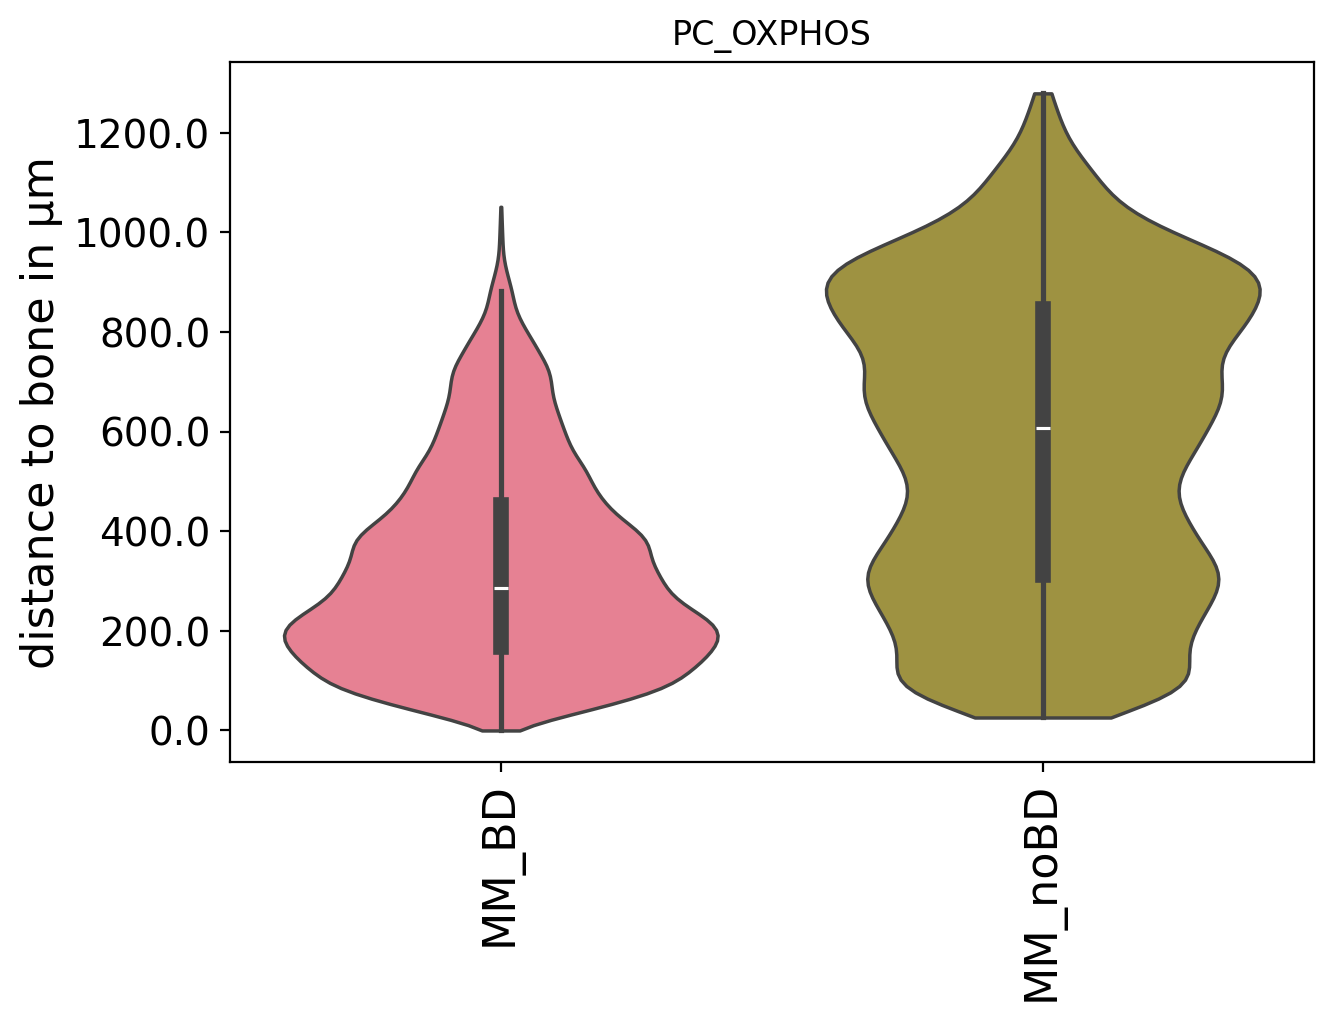

In [40]:
neighborhood = 'PC_OXPHOS'
adata_subset = adata_cc[adata_cc.obs['cellcharter_CN'] == neighborhood].copy()
axes = sc.pl.violin(adata_subset, keys='distance_to_bone_corrected', groupby='disease2', 
            stripplot=False, use_raw=False, rotation=90, palette=disease_color_map, 
            inner='box', show=False)
axes.set_title(neighborhood)
axes.set_ylabel('distance to bone in µm', fontsize=16)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90, fontsize=16)
axes.set_yticklabels(axes.get_yticks(), fontsize=14)
plt.tight_layout()
fig = axes.figure

In [41]:
disease_mapping = adata.obs[['disease2', 'image_ID']].drop_duplicates()
disease_mapping.set_index('image_ID', inplace=True)
disease_mapping

,disease2
image_ID,
TS-373_IMC77_B_001.csv,MM_BD
TS-373_IMC12_UB_001.csv,MM_noBD
TS-373_IMC86_B_002.csv,MM_BD
TS-373_IMC42_B_001.csv,MM_BD
TS-373_IMC35_B_002.csv,MM_BD
...,...
TS-373_IMC66_B_002.csv,MM_BD
TS-373_IMC87-1_UB_001.csv,MM_noBD
TS-373_IMC53_B_002.csv,MM_BD


In [42]:
# mean distance per image
neighborhood = 'PC_OXPHOS'
adata_subset = adata_cc[adata_cc.obs['cellcharter_CN'] == neighborhood].copy()
df = adata_subset.obs[['distance_to_bone_corrected', 'disease2', 'image_ID']]
df

,distance_to_bone_corrected,disease2,image_ID
Object 1879 in TS-373_IMC77_B_001.csv,207.850908,MM_BD,TS-373_IMC77_B_001.csv
Object 1983 in TS-373_IMC77_B_001.csv,175.285481,MM_BD,TS-373_IMC77_B_001.csv
Object 2018 in TS-373_IMC77_B_001.csv,220.864212,MM_BD,TS-373_IMC77_B_001.csv
Object 2024 in TS-373_IMC77_B_001.csv,183.357574,MM_BD,TS-373_IMC77_B_001.csv
Object 2037 in TS-373_IMC77_B_001.csv,194.743421,MM_BD,TS-373_IMC77_B_001.csv
...,...,...,...
Object 353 in TS-373_IMC83_B_001.csv,319.555942,MM_BD,TS-373_IMC83_B_001.csv
Object 361 in TS-373_IMC83_B_001.csv,272.341697,MM_BD,TS-373_IMC83_B_001.csv
Object 365 in TS-373_IMC83_B_001.csv,381.871706,MM_BD,TS-373_IMC83_B_001.csv
Object 370 in TS-373_IMC83_B_001.csv,372.754611,MM_BD,TS-373_IMC83_B_001.csv


In [43]:
df = df.drop(columns='disease2').groupby('image_ID').mean()
df['disease2'] = df.index.map(disease_mapping['disease2'])
df

,distance_to_bone_corrected,disease2
image_ID,,
TS-373_IMC07_UB_001.csv,267.318540,MM_noBD
TS-373_IMC07_UB_002.csv,879.192733,MM_noBD
TS-373_IMC08_UB_001.csv,198.664952,MM_BD
TS-373_IMC08_UB_002.csv,254.003187,MM_BD
TS-373_IMC12_UB_001.csv,385.619806,MM_noBD
...,...,...
TS-373_IMC89_B_001.csv,347.603186,MM_BD
TS-373_IMC90.1_B_001.csv,379.323448,MM_BD
TS-373_IMC90.1_B_002.csv,208.235132,MM_BD


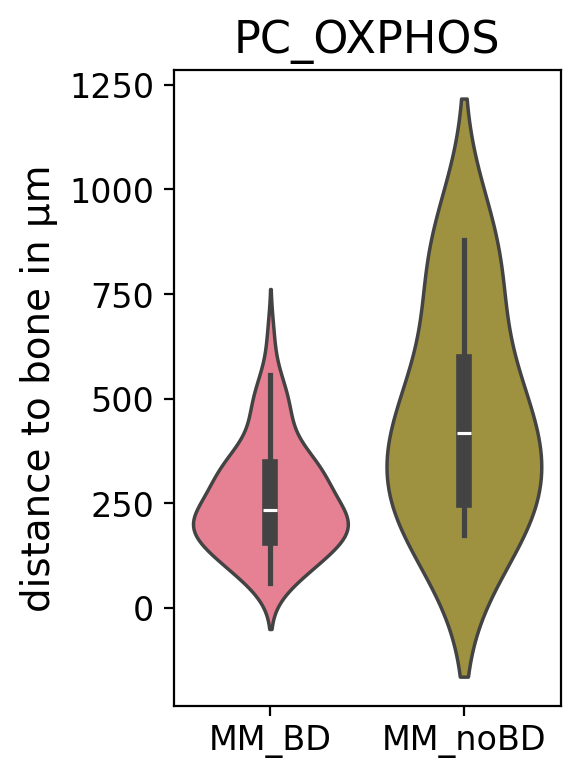

In [44]:
fig, ax = plt.subplots(figsize=(3, 4))
sns.violinplot(data=df, x='disease2', y='distance_to_bone_corrected', palette=disease_color_map, ax=ax)
ax.set_yticks(np.arange(0, 1251, 250))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('distance to bone in µm', fontsize=14)
ax.set_title(neighborhood, fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(save_path, f'distance_to_bone_{neighborhood}_cohorts.{extension}'))

In [45]:
bd = df[df['disease2'] == 'MM_BD']['distance_to_bone_corrected']
nobd = df[df['disease2'] == 'MM_noBD']['distance_to_bone_corrected']
stat, p_value = mannwhitneyu(bd, nobd, alternative='two-sided')
print("Mann–Whitney U test statistic:", stat)
print("P-value:", p_value)

Mann–Whitney U test statistic: 139.0
P-value: 0.018586190723847228


# D

# E

In [46]:
# see fiure_4_OC_neighborhood.ipynb

In [11]:
celltype = 'PCs'
adata.obs['disease2'] = adata.obs['disease2'].astype(str)
adata = adata[adata.obs['disease2'].isin(['MM_BD', 'MM_noBD'])]
adata.obs['disease2'] = adata.obs['disease2'].astype('category')
disease_mapping = adata.obs[['disease2', 'image_ID']].drop_duplicates()
disease_mapping.set_index('image_ID', inplace=True)

In [52]:
df = adata[
    (adata.obs['Phenotype4'] == celltype)].to_df()
df['distance_to_bone_corrected'] = adata.obs.loc[df.index, 'distance_to_bone_corrected']
df['disease2'] = adata.obs.loc[df.index, 'disease2']
#df['HistoneH3'] = adata.obs.loc[df.index, 'HistoneH3_clr']

In [53]:
df

,CD38,Perilipin,Vimentin,B4GALT1,MPO,CathepsinK,ATP5A,RUNX2,HIF1A,CD11b,...,Ki67,CollagenTypeI,CD3,CPT1A,CD98,HLA-DR,ST6GAL1,CD138,distance_to_bone_corrected,disease2
Object 1 in TS-373_IMC77_B_001.csv,0.285836,0.294962,0.381280,0.208380,0.470309,0.000000,0.347032,0.118177,0.245371,0.422768,...,0.133152,0.698834,0.785446,0.734610,0.277531,0.523756,0.136619,0.104558,26.019224,MM_BD
Object 15 in TS-373_IMC77_B_001.csv,0.584050,0.226002,0.743808,0.527641,0.396565,0.118083,0.357526,0.018114,0.512743,0.553887,...,0.499312,0.044117,0.351875,0.695553,0.258422,0.396671,0.371555,0.546733,91.241438,MM_BD
Object 32 in TS-373_IMC77_B_001.csv,0.391237,0.254091,0.419591,0.333855,0.669573,0.089656,0.375071,0.034897,0.222456,0.423251,...,0.834905,1.058062,0.377810,0.568603,0.245792,0.209839,0.352995,0.122934,2.000000,MM_BD
Object 60 in TS-373_IMC77_B_001.csv,0.563274,0.243710,0.785126,0.545517,0.465828,0.098735,0.654439,0.057979,0.563328,0.603363,...,0.759769,0.037422,0.263463,0.769195,0.328007,0.321675,0.445502,0.397583,86.145226,MM_BD
Object 75 in TS-373_IMC77_B_001.csv,0.608792,0.340158,0.683539,0.554623,0.654572,0.102201,0.610767,0.145675,0.482252,0.577713,...,0.398069,0.304837,0.607238,0.694769,0.453150,0.501196,0.458932,0.391751,21.540659,MM_BD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Object 6578 in TS-373_IMC83_B_001.csv,0.861340,0.365933,0.825304,0.556172,0.455680,0.209952,0.649228,0.116668,0.688679,0.545271,...,0.149396,0.527905,0.449939,0.817067,0.613738,0.627700,0.534086,0.286428,33.241540,MM_BD
Object 6592 in TS-373_IMC83_B_001.csv,0.726540,0.307771,0.507935,0.662648,0.277004,0.182987,0.779196,0.124444,0.637949,0.575766,...,0.304804,0.307076,0.492101,0.785394,0.618533,0.494449,0.628639,0.270694,148.734663,MM_BD
Object 6593 in TS-373_IMC83_B_001.csv,0.588351,0.300972,0.336872,0.676870,0.228257,0.202051,0.836995,0.137087,0.516838,0.546555,...,0.337460,0.330812,0.521410,0.831077,0.642627,0.506378,0.636885,0.119877,156.339374,MM_BD
Object 6602 in TS-373_IMC83_B_001.csv,0.762172,0.399725,0.891862,0.605014,0.512899,0.223538,0.757393,0.127421,0.464083,0.601980,...,0.508901,0.483204,0.403019,0.701174,0.606858,0.582224,0.496055,0.356622,69.462220,MM_BD


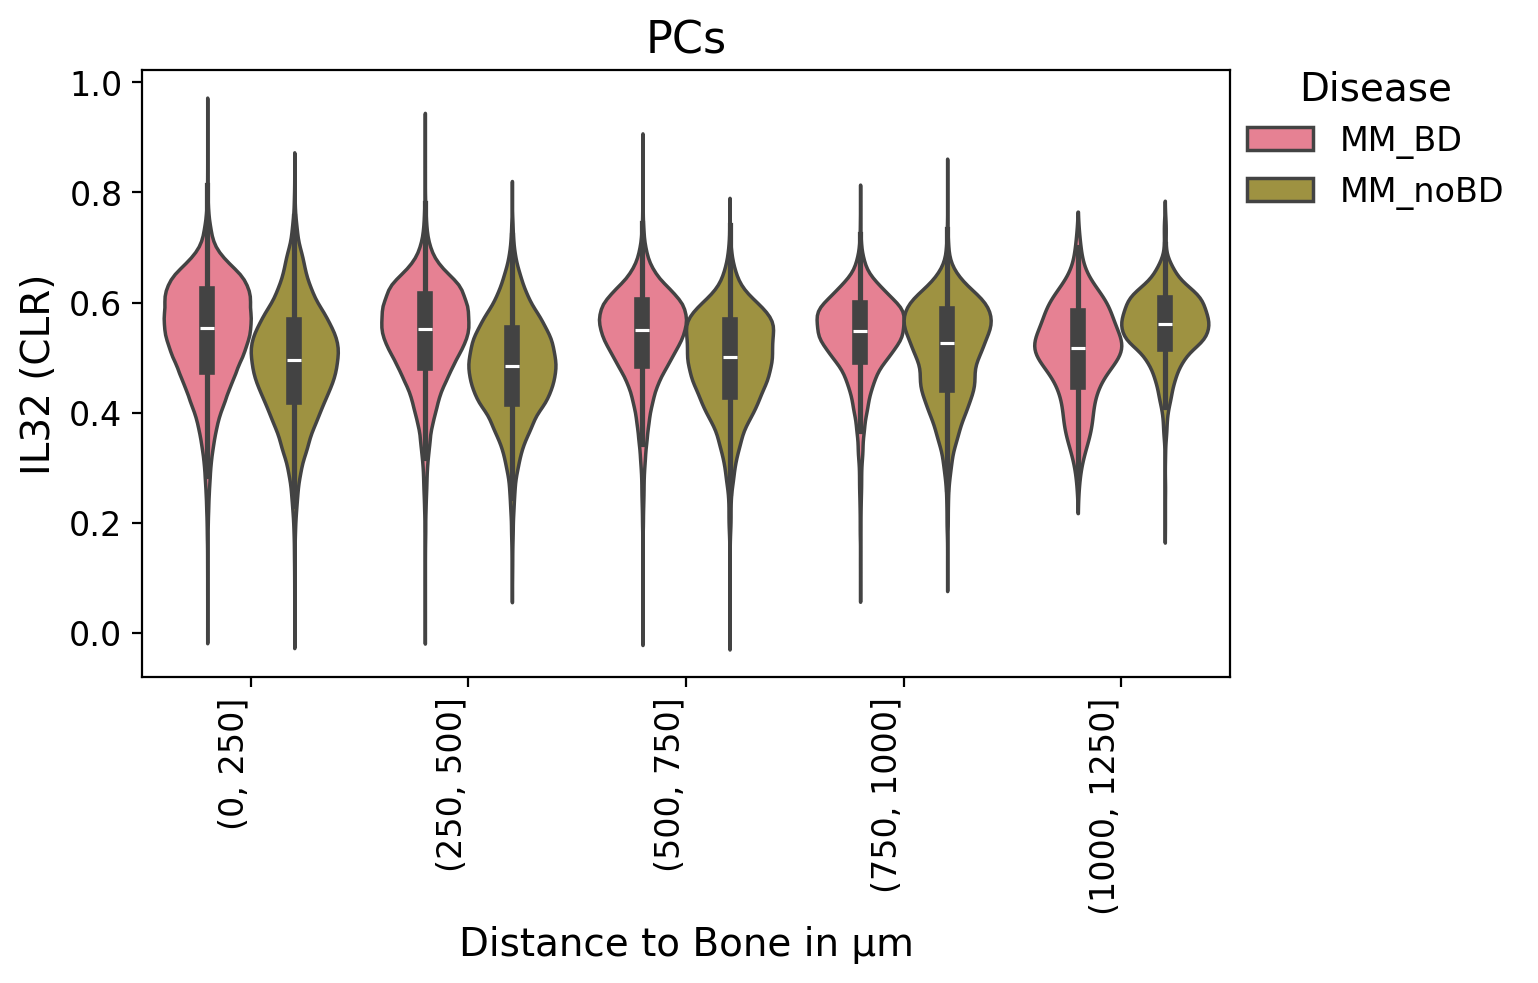

In [54]:
plt.style.use('default')
marker = 'IL32'
df['distance_bin'] = pd.cut(df['distance_to_bone_corrected'], 
                           bins=range(0, 1251, 250))

plt.figure(figsize=(8,5))
sns.violinplot(
    data=df,
    x="distance_bin",
    y=marker,
    hue="disease2",
    palette=disease_color_map,
    inner="box",
    scale="width",
)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Distance to Bone in µm", fontsize=14)
plt.ylabel(f"{marker} (CLR)", fontsize=14)
plt.legend(title='Disease', loc='upper right', bbox_to_anchor=(1.28, 1.05), framealpha=0, fontsize=12, title_fontsize=14)
plt.title(f"{celltype}", fontsize=16)
plt.tight_layout()
if celltype == 'Plasma Cells/MM cells':
    celltype_file = 'Plasma_Cells_MM_cells'
plt.savefig(os.path.join(save_path, f"{marker}_{celltype}_distance_to_bone_violinplot.{extension}"))
plt.show()

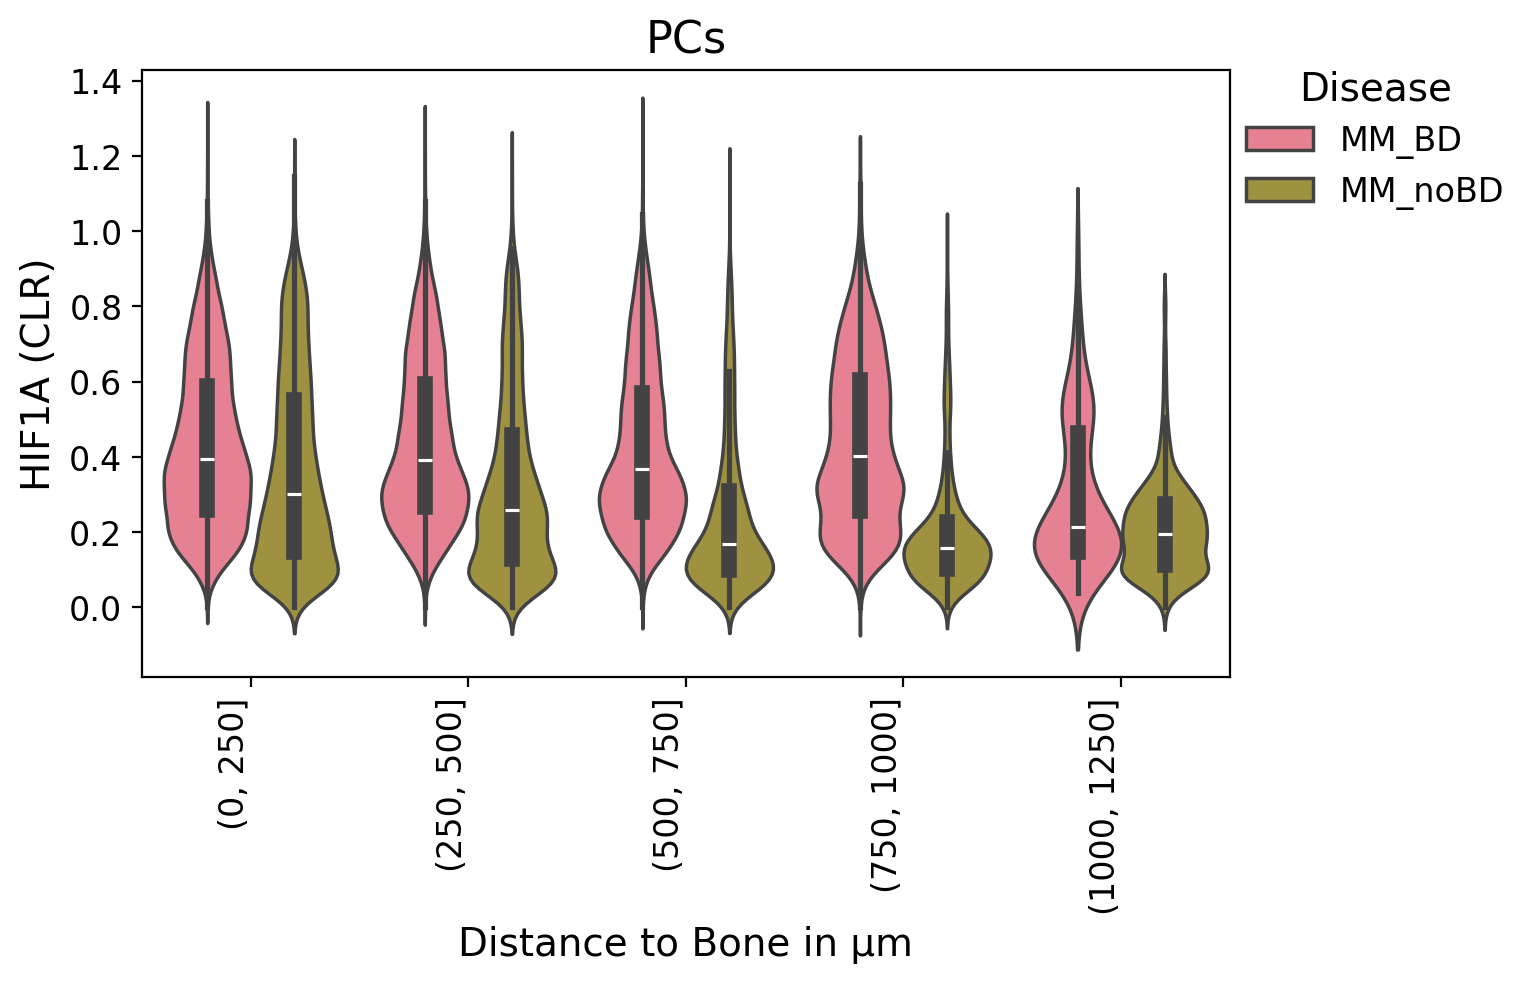

In [55]:
plt.style.use('default')
marker = 'HIF1A'
df['distance_bin'] = pd.cut(df['distance_to_bone_corrected'], 
                           bins=range(0, 1251, 250))

plt.figure(figsize=(8,5))
sns.violinplot(
    data=df,
    x="distance_bin",
    y=marker,
    hue="disease2",
    palette=disease_color_map,
    inner="box",
    scale="width",
)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Distance to Bone in µm", fontsize=14)
plt.ylabel(f"{marker} (CLR)", fontsize=14)
plt.legend(title='Disease', loc='upper right', bbox_to_anchor=(1.28, 1.05), framealpha=0, fontsize=12, title_fontsize=14)
plt.title(f"{celltype}", fontsize=16)
plt.tight_layout()
if celltype == 'Plasma Cells/MM cells':
    celltype_file = 'Plasma_Cells_MM_cells'
plt.savefig(os.path.join(save_path, f"{marker}_{celltype}_distance_to_bone_violinplot.{extension}"))
plt.show()

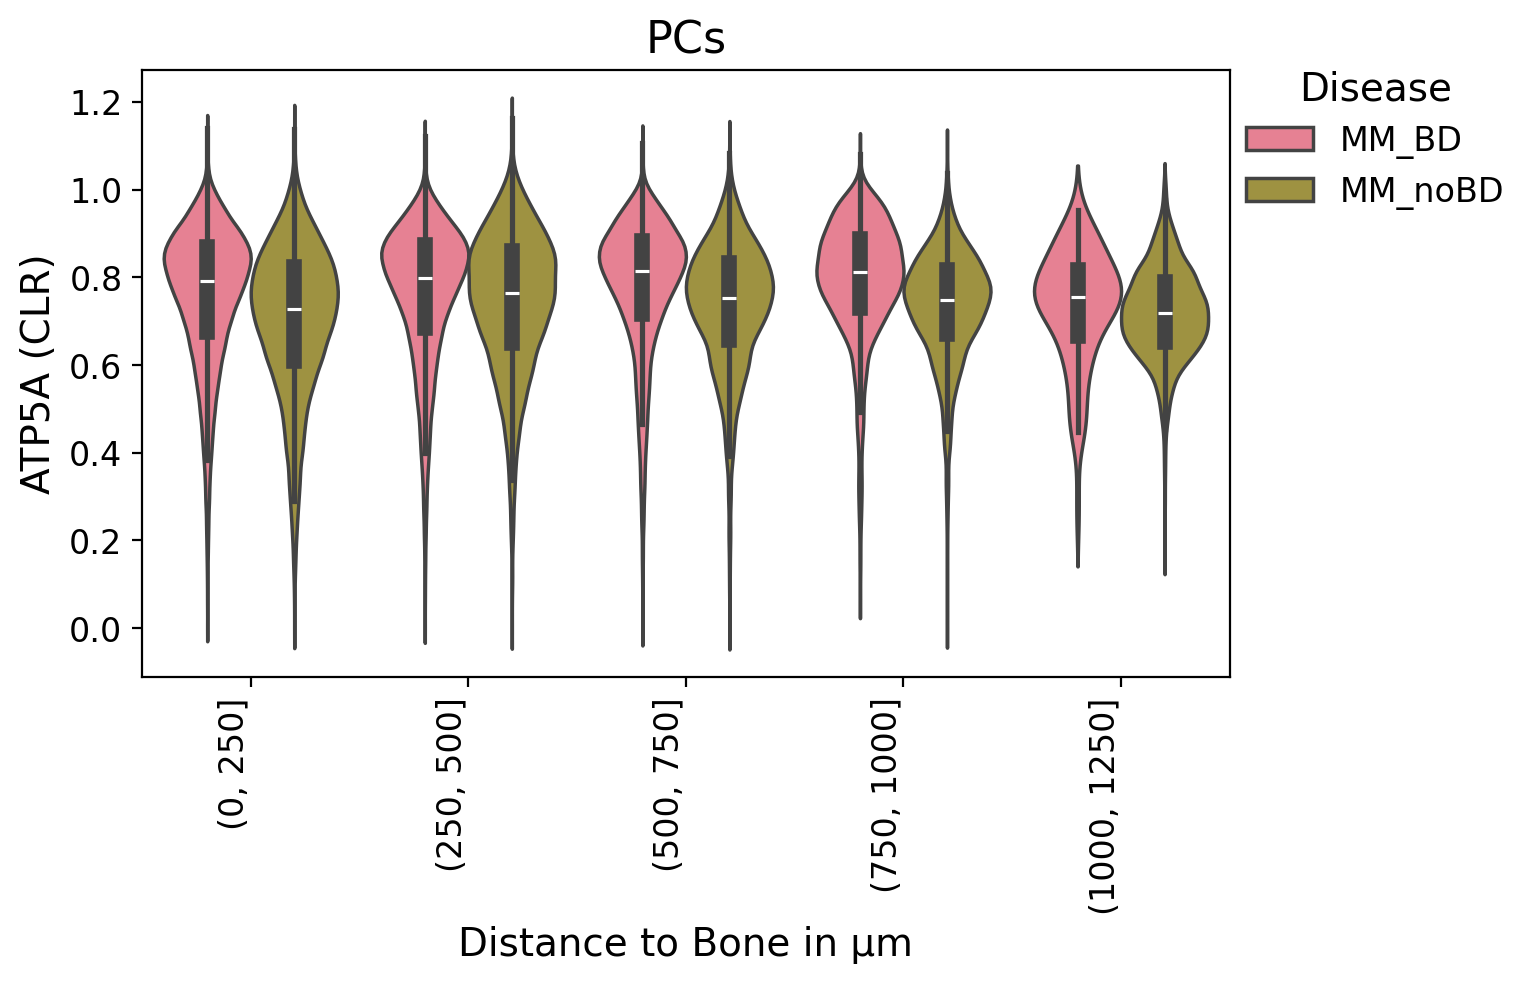

In [56]:
plt.style.use('default')
marker = 'ATP5A'
df['distance_bin'] = pd.cut(df['distance_to_bone_corrected'], 
                           bins=range(0, 1251, 250))

plt.figure(figsize=(8,5))
sns.violinplot(
    data=df,
    x="distance_bin",
    y=marker,
    hue="disease2",
    palette=disease_color_map,
    inner="box",
    scale="width",
)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Distance to Bone in µm", fontsize=14)
plt.ylabel(f"{marker} (CLR)", fontsize=14)
plt.legend(title='Disease', loc='upper right', bbox_to_anchor=(1.28, 1.05), framealpha=0, fontsize=12, title_fontsize=14)
plt.title(f"{celltype}", fontsize=16)
plt.tight_layout()
if celltype == 'Plasma Cells/MM cells':
    celltype_file = 'Plasma_Cells_MM_cells'
plt.savefig(os.path.join(save_path, f"{marker}_{celltype}_distance_to_bone_violinplot.{extension}"))
plt.show()

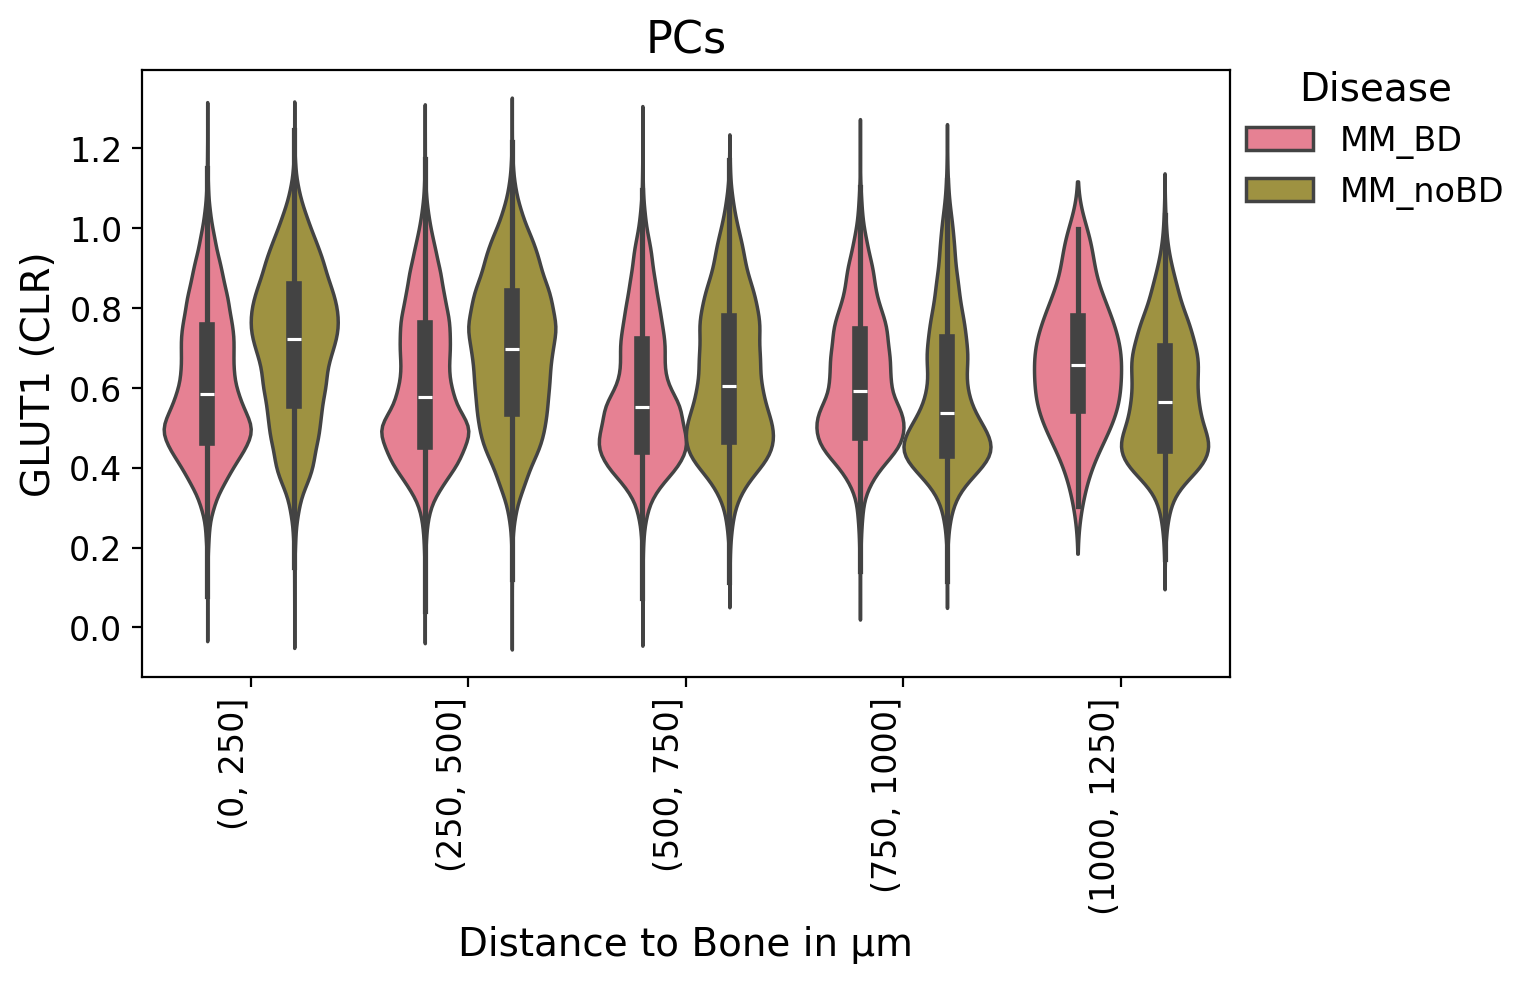

In [57]:
plt.style.use('default')
marker = 'GLUT1'
df['distance_bin'] = pd.cut(df['distance_to_bone_corrected'], 
                           bins=range(0, 1251, 250))

plt.figure(figsize=(8,5))
sns.violinplot(
    data=df,
    x="distance_bin",
    y=marker,
    hue="disease2",
    palette=disease_color_map,
    inner="box",
    scale="width",
)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Distance to Bone in µm", fontsize=14)
plt.ylabel(f"{marker} (CLR)", fontsize=14)
plt.legend(title='Disease', loc='upper right', bbox_to_anchor=(1.28, 1.05), framealpha=0, fontsize=12, title_fontsize=14)
plt.title(f"{celltype}", fontsize=16)
plt.tight_layout()
if celltype == 'Plasma Cells/MM cells':
    celltype_file = 'Plasma_Cells_MM_cells'
plt.savefig(os.path.join(save_path, f"{marker}_{celltype}_distance_to_bone_violinplot.{extension}"))
plt.show()

In [58]:
def calculate_rowwise_clr_with_obs(
    adata,
    obs_marker_name: str = 'HistoneH3'
) -> pd.DataFrame:

    df = adata.to_df()
    df[obs_marker_name] = adata.obs[obs_marker_name]
    x = df.values
    log1p_x = np.log1p(x)
    mean_log1p_x_per_row = log1p_x.sum(axis=1, keepdims=True) / x.shape[1]

    geom_mean_1p_per_row = np.exp(mean_log1p_x_per_row)
    ratio = x / geom_mean_1p_per_row

    # Apply the final log1p transformation
    clr_transformed_values = np.log1p(ratio)

    # 4. Create the final DataFrame
    clr_df = pd.DataFrame(clr_transformed_values, index=df.index, columns=df.columns)

    return clr_df

In [59]:
# As Histone is in .obs, manual clr calculation is required
adata_test = adata.copy()
adata_test.X = adata_test.layers['arcsinh']
df = calculate_rowwise_clr_with_obs(adata_test, obs_marker_name='HistoneH3')
df['distance_to_bone_corrected'] = adata.obs['distance_to_bone_corrected']
df['disease2'] = adata.obs['disease2']
df['Phenotype4'] = adata.obs['Phenotype4']
celltype = 'PCs'
df = df[df['Phenotype4'] == celltype]

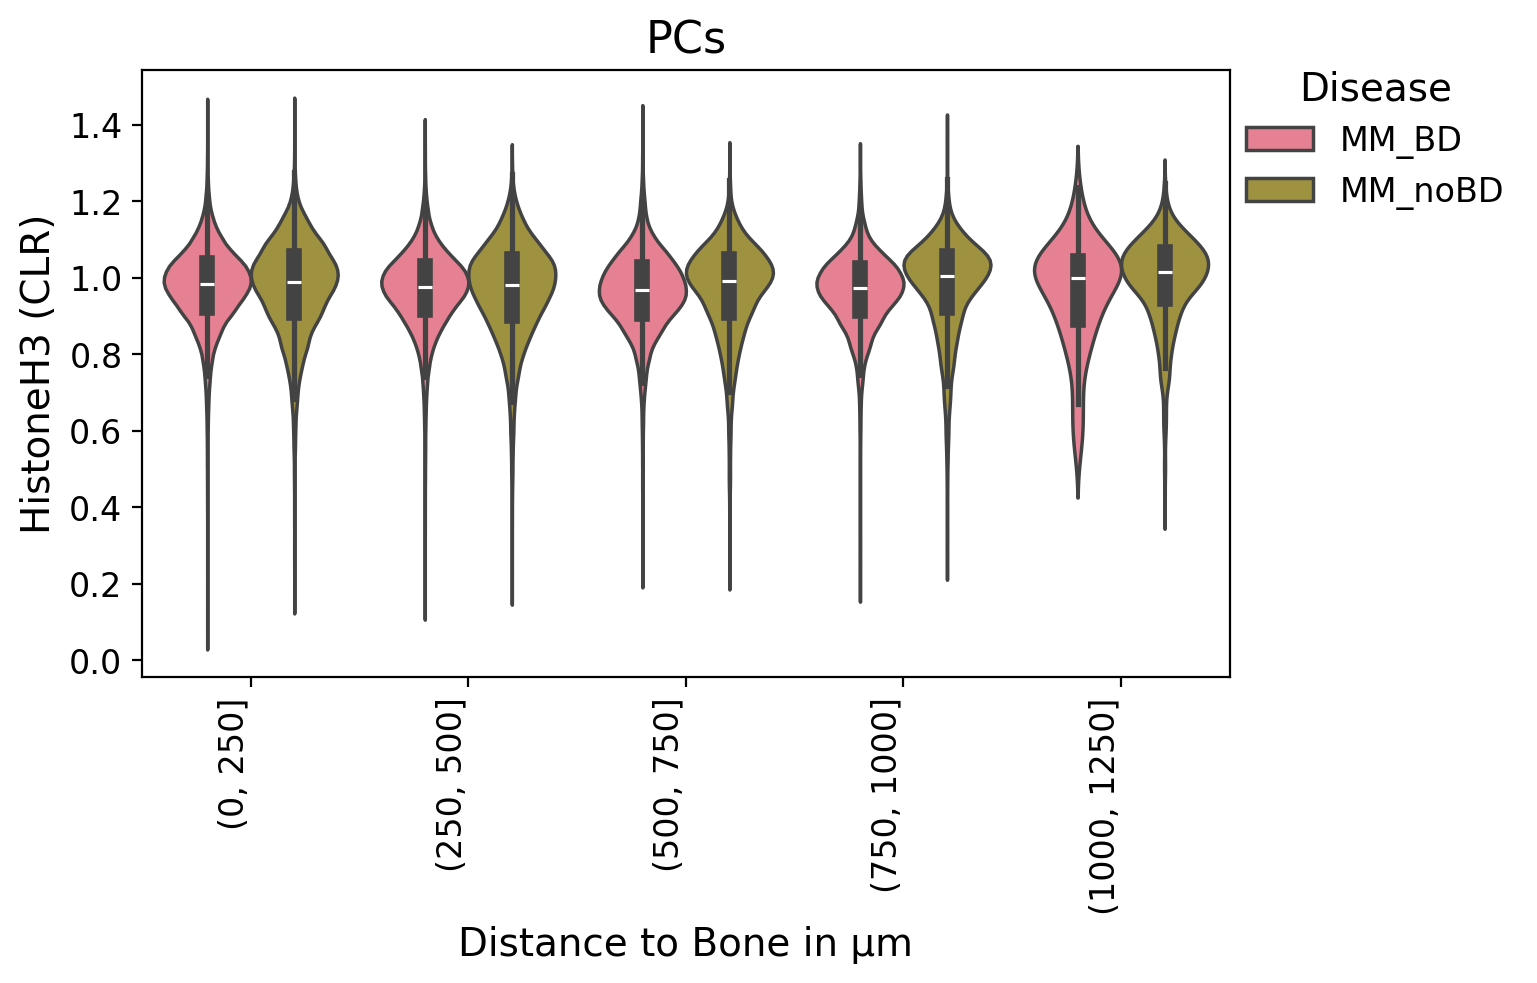

In [60]:
plt.style.use('default')
marker = 'HistoneH3'
df['distance_bin'] = pd.cut(df['distance_to_bone_corrected'], 
                           bins=range(0, 1251, 250))

plt.figure(figsize=(8,5))
sns.violinplot(
    data=df,
    x="distance_bin",
    y=marker,
    hue="disease2",
    palette=disease_color_map,
    inner="box",
    scale="width",
)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Distance to Bone in µm", fontsize=14)
plt.ylabel(f"{marker} (CLR)", fontsize=14)
plt.legend(title='Disease', loc='upper right', bbox_to_anchor=(1.28, 1.05), framealpha=0, fontsize=12, title_fontsize=14)
plt.title(f"{celltype}", fontsize=16)
plt.tight_layout()
if celltype == 'Plasma Cells/MM cells':
    celltype_file = 'Plasma_Cells_MM_cells'
plt.savefig(os.path.join(save_path, f"{marker}_{celltype}_distance_to_bone_violinplot.{extension}"))
plt.show()

In [42]:
celltype= 'PCs'

In [43]:
df = adata[
    (adata.obs['Phenotype4'] == celltype)].to_df()
df['distance_to_bone_corrected'] = adata.obs.loc[df.index, 'distance_to_bone_corrected']
df['image_ID'] = adata.obs.loc[df.index, 'image_ID']
df['HistoneH3'] = adata.obs.loc[df.index, 'HistoneH3']
df['distance_bin'] = pd.cut(df['distance_to_bone_corrected'],
                            bins=range(0, 601, 100))
df

,CD38,Perilipin,Vimentin,B4GALT1,MPO,CathepsinK,ATP5A,RUNX2,HIF1A,CD11b,...,CD3,CPT1A,CD98,HLA-DR,ST6GAL1,CD138,distance_to_bone_corrected,image_ID,HistoneH3,distance_bin
Object 1 in TS-373_IMC77_B_001.csv,0.285836,0.294962,0.381280,0.208380,0.470309,0.000000,0.347032,0.118177,0.245371,0.422768,...,0.785446,0.734610,0.277531,0.523756,0.136619,0.104558,26.019224,TS-373_IMC77_B_001.csv,4.374106,"(0, 100]"
Object 15 in TS-373_IMC77_B_001.csv,0.584050,0.226002,0.743808,0.527641,0.396565,0.118083,0.357526,0.018114,0.512743,0.553887,...,0.351875,0.695553,0.258422,0.396671,0.371555,0.546733,91.241438,TS-373_IMC77_B_001.csv,4.189269,"(0, 100]"
Object 32 in TS-373_IMC77_B_001.csv,0.391237,0.254091,0.419591,0.333855,0.669573,0.089656,0.375071,0.034897,0.222456,0.423251,...,0.377810,0.568603,0.245792,0.209839,0.352995,0.122934,2.000000,TS-373_IMC77_B_001.csv,3.736030,"(0, 100]"
Object 60 in TS-373_IMC77_B_001.csv,0.563274,0.243710,0.785126,0.545517,0.465828,0.098735,0.654439,0.057979,0.563328,0.603363,...,0.263463,0.769195,0.328007,0.321675,0.445502,0.397583,86.145226,TS-373_IMC77_B_001.csv,4.208995,"(0, 100]"
Object 75 in TS-373_IMC77_B_001.csv,0.608792,0.340158,0.683539,0.554623,0.654572,0.102201,0.610767,0.145675,0.482252,0.577713,...,0.607238,0.694769,0.453150,0.501196,0.458932,0.391751,21.540659,TS-373_IMC77_B_001.csv,4.892887,"(0, 100]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Object 6578 in TS-373_IMC83_B_001.csv,0.861340,0.365933,0.825304,0.556172,0.455680,0.209952,0.649228,0.116668,0.688679,0.545271,...,0.449939,0.817067,0.613738,0.627700,0.534086,0.286428,33.241540,TS-373_IMC83_B_001.csv,4.523743,"(0, 100]"
Object 6592 in TS-373_IMC83_B_001.csv,0.726540,0.307771,0.507935,0.662648,0.277004,0.182987,0.779196,0.124444,0.637949,0.575766,...,0.492101,0.785394,0.618533,0.494449,0.628639,0.270694,148.734663,TS-373_IMC83_B_001.csv,4.208583,"(100, 200]"
Object 6593 in TS-373_IMC83_B_001.csv,0.588351,0.300972,0.336872,0.676870,0.228257,0.202051,0.836995,0.137087,0.516838,0.546555,...,0.521410,0.831077,0.642627,0.506378,0.636885,0.119877,156.339374,TS-373_IMC83_B_001.csv,4.220257,"(100, 200]"
Object 6602 in TS-373_IMC83_B_001.csv,0.762172,0.399725,0.891862,0.605014,0.512899,0.223538,0.757393,0.127421,0.464083,0.601980,...,0.403019,0.701174,0.606858,0.582224,0.496055,0.356622,69.462220,TS-373_IMC83_B_001.csv,4.821438,"(0, 100]"


In [44]:
target = pd.Interval(0, 75, closed='right')
arr = df[df['distance_bin'] == target]['image_ID'].value_counts()

<Axes: xlabel='image_ID'>

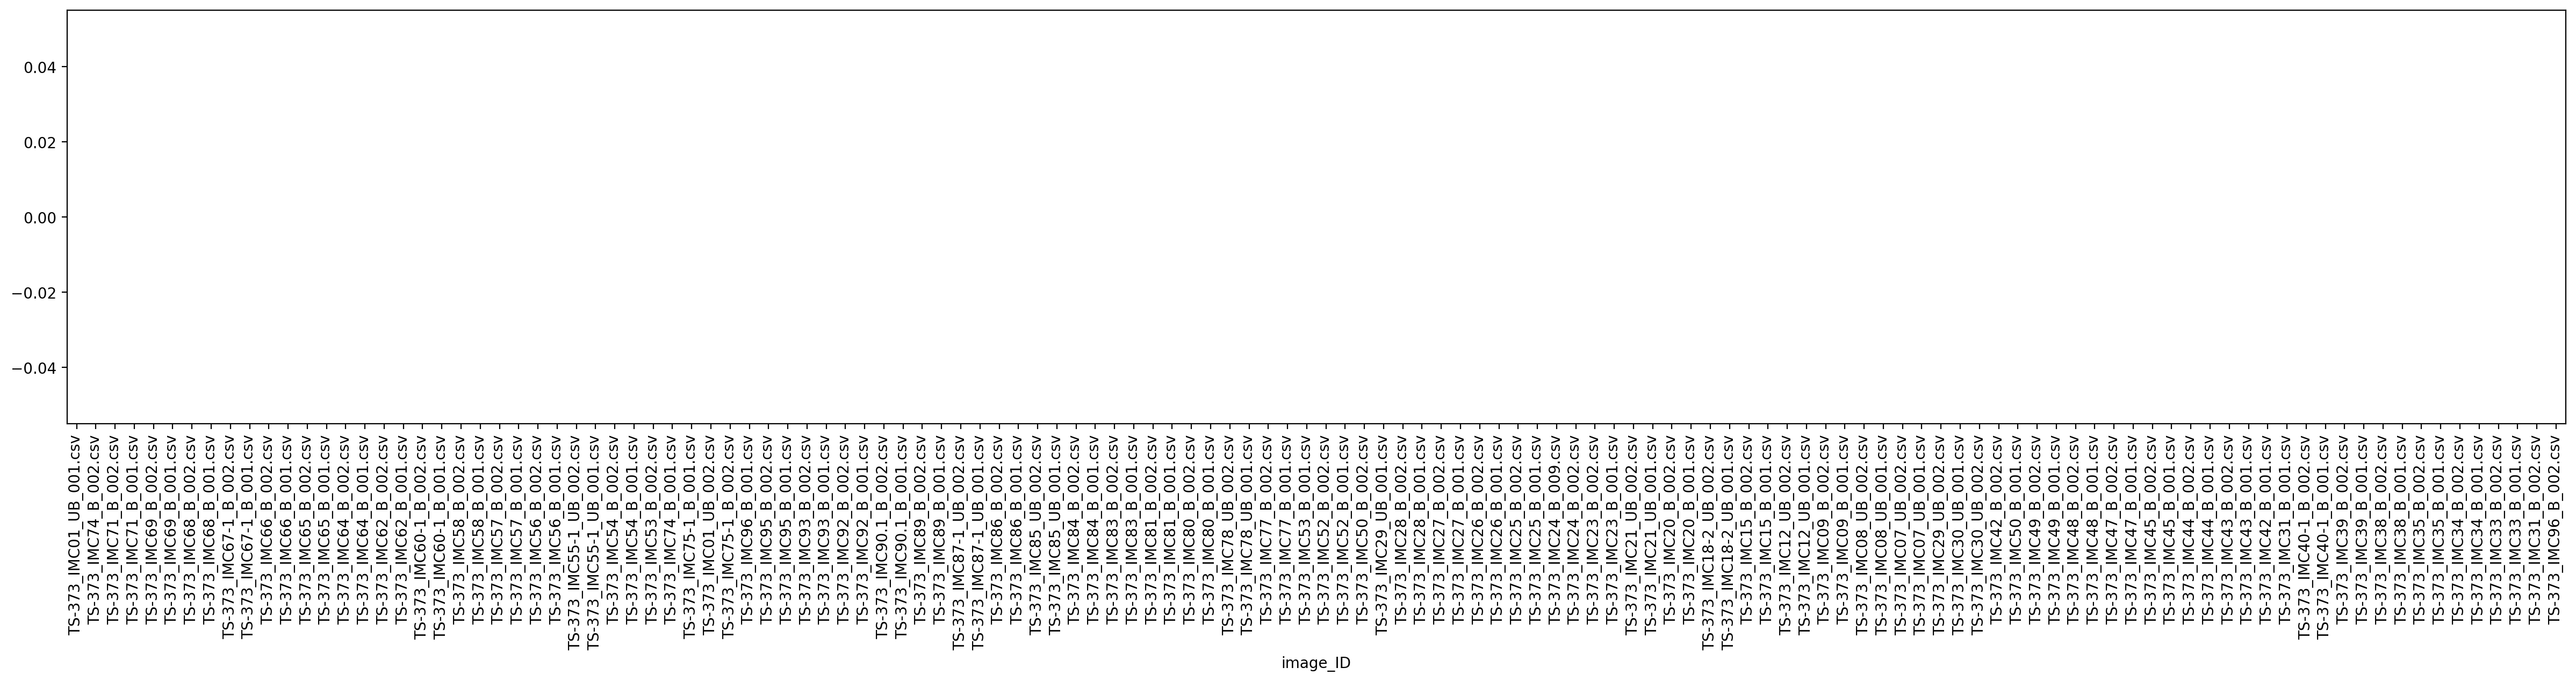

In [45]:
arr.plot(kind='bar', figsize=(30, 5), color='blue')

In [78]:
df = adata[
    (adata.obs['Phenotype4'] == celltype)].to_df()
df['distance_to_bone_corrected'] = adata.obs.loc[df.index, 'distance_to_bone_corrected']
df['image_ID'] = adata.obs.loc[df.index, 'image_ID']
df['HistoneH3'] = adata.obs.loc[df.index, 'HistoneH3']
df['distance_bin'] = pd.cut(df['distance_to_bone_corrected'], 
                           bins=range(0, 601, 100))
df

,CD38,Perilipin,Vimentin,B4GALT1,MPO,CathepsinK,ATP5A,RUNX2,HIF1A,CD11b,...,CD3,CPT1A,CD98,HLA-DR,ST6GAL1,CD138,distance_to_bone_corrected,image_ID,HistoneH3,distance_bin
Object 1 in TS-373_IMC77_B_001.csv,0.285836,0.294962,0.381280,0.208380,0.470309,0.000000,0.347032,0.118177,0.245371,0.422768,...,0.785446,0.734610,0.277531,0.523756,0.136619,0.104558,26.019224,TS-373_IMC77_B_001.csv,4.374106,"(0, 100]"
Object 15 in TS-373_IMC77_B_001.csv,0.584050,0.226002,0.743808,0.527641,0.396565,0.118083,0.357526,0.018114,0.512743,0.553887,...,0.351875,0.695553,0.258422,0.396671,0.371555,0.546733,91.241438,TS-373_IMC77_B_001.csv,4.189269,"(0, 100]"
Object 32 in TS-373_IMC77_B_001.csv,0.391237,0.254091,0.419591,0.333855,0.669573,0.089656,0.375071,0.034897,0.222456,0.423251,...,0.377810,0.568603,0.245792,0.209839,0.352995,0.122934,2.000000,TS-373_IMC77_B_001.csv,3.736030,"(0, 100]"
Object 60 in TS-373_IMC77_B_001.csv,0.563274,0.243710,0.785126,0.545517,0.465828,0.098735,0.654439,0.057979,0.563328,0.603363,...,0.263463,0.769195,0.328007,0.321675,0.445502,0.397583,86.145226,TS-373_IMC77_B_001.csv,4.208995,"(0, 100]"
Object 75 in TS-373_IMC77_B_001.csv,0.608792,0.340158,0.683539,0.554623,0.654572,0.102201,0.610767,0.145675,0.482252,0.577713,...,0.607238,0.694769,0.453150,0.501196,0.458932,0.391751,21.540659,TS-373_IMC77_B_001.csv,4.892887,"(0, 100]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Object 6578 in TS-373_IMC83_B_001.csv,0.861340,0.365933,0.825304,0.556172,0.455680,0.209952,0.649228,0.116668,0.688679,0.545271,...,0.449939,0.817067,0.613738,0.627700,0.534086,0.286428,33.241540,TS-373_IMC83_B_001.csv,4.523743,"(0, 100]"
Object 6592 in TS-373_IMC83_B_001.csv,0.726540,0.307771,0.507935,0.662648,0.277004,0.182987,0.779196,0.124444,0.637949,0.575766,...,0.492101,0.785394,0.618533,0.494449,0.628639,0.270694,148.734663,TS-373_IMC83_B_001.csv,4.208583,"(100, 200]"
Object 6593 in TS-373_IMC83_B_001.csv,0.588351,0.300972,0.336872,0.676870,0.228257,0.202051,0.836995,0.137087,0.516838,0.546555,...,0.521410,0.831077,0.642627,0.506378,0.636885,0.119877,156.339374,TS-373_IMC83_B_001.csv,4.220257,"(100, 200]"
Object 6602 in TS-373_IMC83_B_001.csv,0.762172,0.399725,0.891862,0.605014,0.512899,0.223538,0.757393,0.127421,0.464083,0.601980,...,0.403019,0.701174,0.606858,0.582224,0.496055,0.356622,69.462220,TS-373_IMC83_B_001.csv,4.821438,"(0, 100]"


In [79]:
target = pd.Interval(0, 100, closed='right')
arr = df[df['distance_bin'] == target]['image_ID'].value_counts()
exclude = arr[arr <= 75].index.to_list()
df = df[~df['image_ID'].isin(exclude)]

In [80]:
df = df.groupby(['distance_bin', 'image_ID']).agg('mean').reset_index().dropna()
df['disease2'] = df['image_ID'].map(disease_mapping['disease2'])
df['distance_bin'] = df['distance_bin'].astype(str)

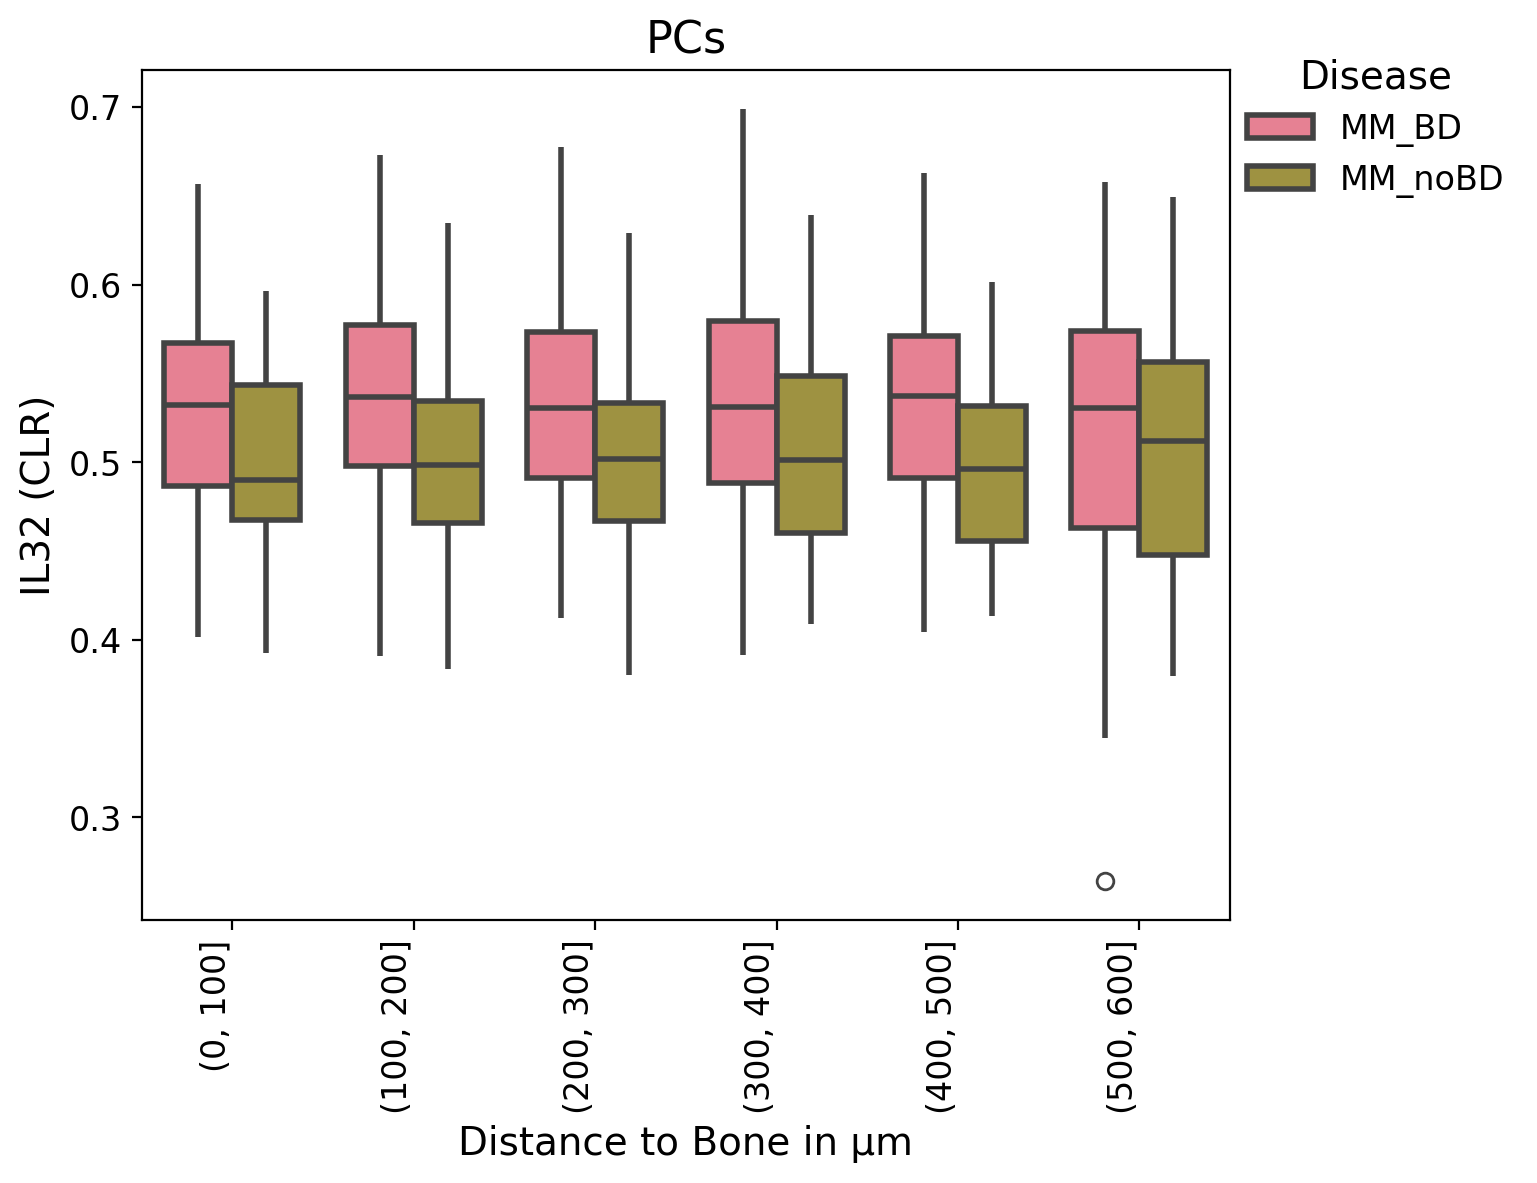

In [81]:
plt.style.use('default')
marker = 'IL32'
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x="distance_bin",
    y=marker,
    hue="disease2",
    palette=disease_color_map,
    showcaps=False,
    linewidth=2,
    width=0.75
)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Distance to Bone in µm", fontsize=14)
plt.ylabel(f"{marker} (CLR)", fontsize=14)
plt.legend(title='Disease', loc='upper right', bbox_to_anchor=(1.28, 1.05), framealpha=0, fontsize=12, title_fontsize=14)
plt.title(f"{celltype}", fontsize=16)
plt.tight_layout()
if celltype == 'Plasma Cells/MM cells':
    celltype_file = 'Plasma_Cells_MM_cells'
plt.savefig(os.path.join(save_path, f"{marker}_{celltype}_distance_to_bone_violinplot_perimage.{extension}"))
plt.show()

In [82]:
bd = df[(df['disease2'] == 'MM_BD') & (df['distance_bin'] == '(0, 100]')]['IL32'].values
no_bd = df[(df['disease2'] == 'MM_noBD') & (df['distance_bin'] == '(0, 100]')]['IL32'].values
stat, p_value = ttest_ind(bd, no_bd, alternative='greater')
print("T-test statistic:", stat)
print("P-value:", p_value)

T-test statistic: 1.6171866178626306
P-value: 0.05451003347420104


In [83]:
bd = df[(df['disease2'] == 'MM_BD') & (df['distance_bin'] == '(100, 200]')]['IL32'].values
no_bd = df[(df['disease2'] == 'MM_noBD') & (df['distance_bin'] == '(100, 200]')]['IL32'].values
stat, p_value = ttest_ind(bd, no_bd, alternative='greater')
print("T-test statistic:", stat)
print("P-value:", p_value)

T-test statistic: 1.6740714954271165
P-value: 0.0486365912570733


In [84]:
bd = df[(df['disease2'] == 'MM_BD') & (df['distance_bin'] == '(200, 300]')]['IL32'].values
no_bd = df[(df['disease2'] == 'MM_noBD') & (df['distance_bin'] == '(200, 300]')]['IL32'].values
stat, p_value = ttest_ind(bd, no_bd, alternative='greater')
print("T-test statistic:", stat)
print("P-value:", p_value)

T-test statistic: 1.8259978475933
P-value: 0.03543239028595992


In [85]:
bd = df[(df['disease2'] == 'MM_BD') & (df['distance_bin'] == '(300, 400]')]['IL32'].values
no_bd = df[(df['disease2'] == 'MM_noBD') & (df['distance_bin'] == '(300, 400]')]['IL32'].values
stat, p_value = ttest_ind(bd, no_bd, alternative='greater')
print("T-test statistic:", stat)
print("P-value:", p_value)

T-test statistic: 1.4473719095320998
P-value: 0.07552526282006734


In [86]:
bd = df[(df['disease2'] == 'MM_BD') & (df['distance_bin'] == '(400, 500]')]['IL32'].values
no_bd = df[(df['disease2'] == 'MM_noBD') & (df['distance_bin'] == '(400, 500]')]['IL32'].values
stat, p_value = ttest_ind(bd, no_bd, alternative='greater')
print("T-test statistic:", stat)
print("P-value:", p_value)

T-test statistic: 2.061736821905007
P-value: 0.021108419937972932


In [87]:
bd = df[(df['disease2'] == 'MM_BD') & (df['distance_bin'] == '(500, 600]')]['IL32'].values
no_bd = df[(df['disease2'] == 'MM_noBD') & (df['distance_bin'] == '(500, 600]')]['IL32'].values
stat, p_value = ttest_ind(bd, no_bd, alternative='greater')
print("T-test statistic:", stat)
print("P-value:", p_value)

T-test statistic: 0.6682174719364028
P-value: 0.2530510717873262


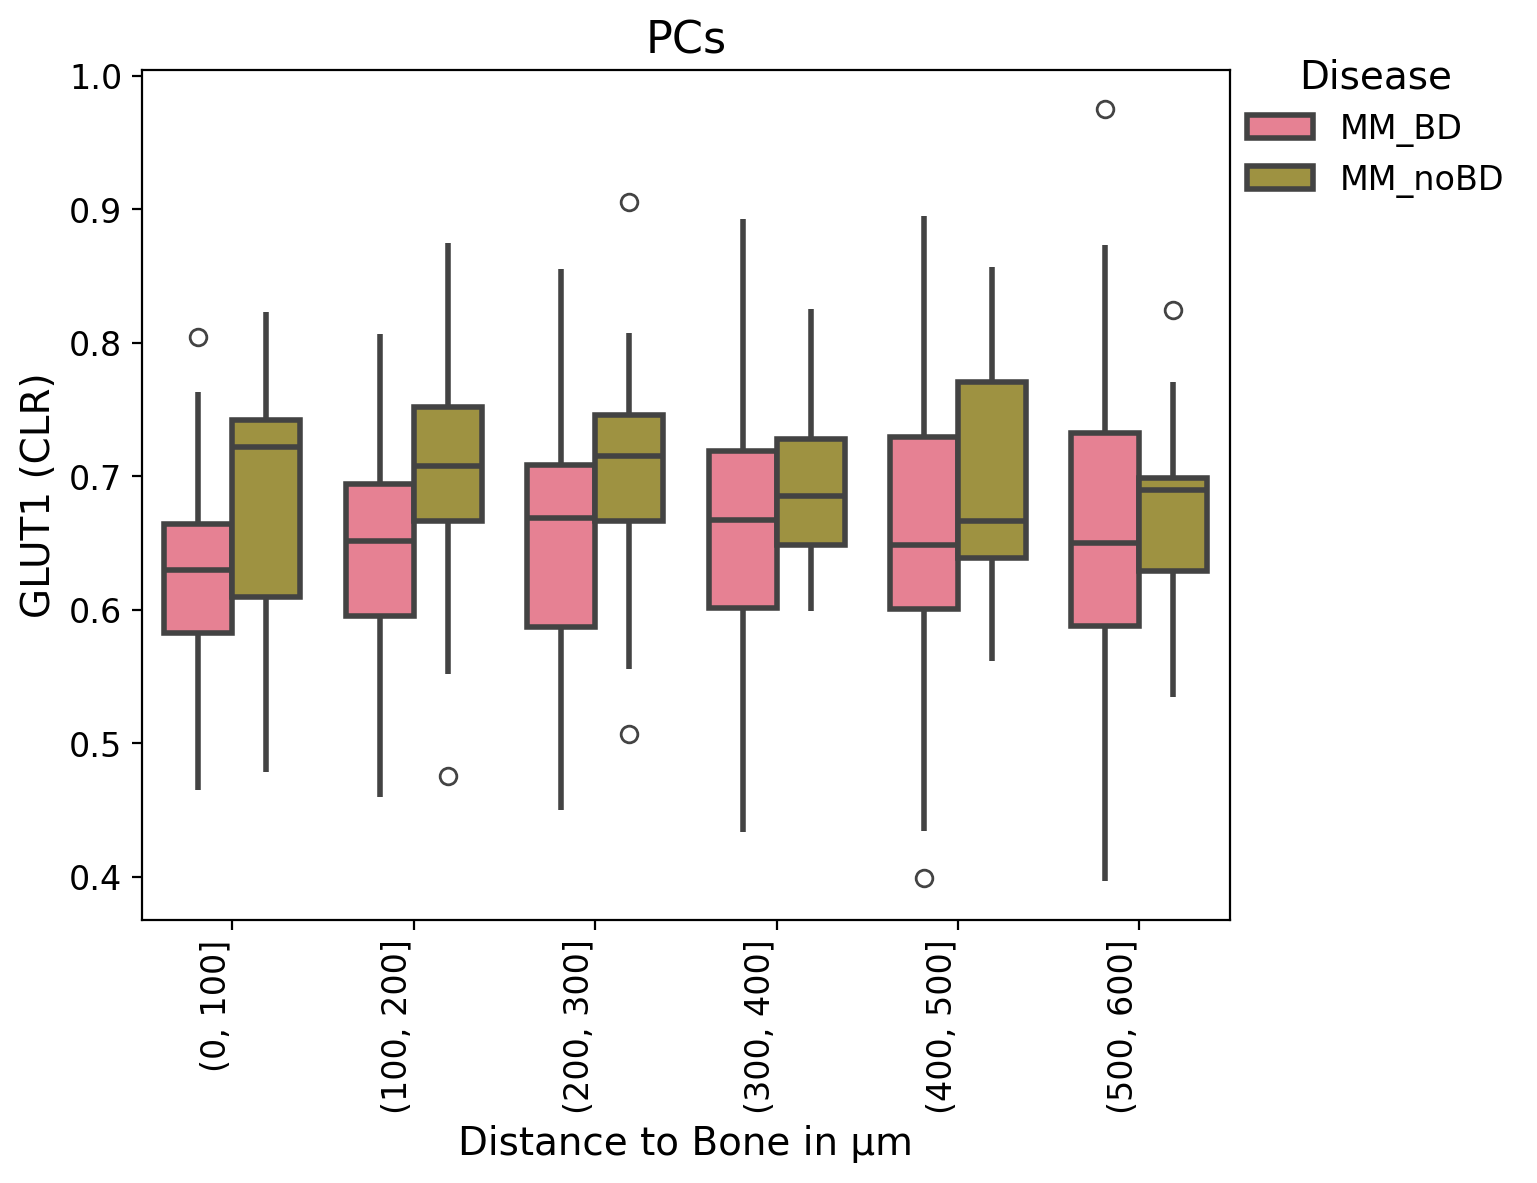

In [88]:
plt.style.use('default')
marker = 'GLUT1'
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x="distance_bin",
    y=marker,
    hue="disease2",
    palette=disease_color_map,
    showcaps=False,
    linewidth=2,
    width=0.75
)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Distance to Bone in µm", fontsize=14)
plt.ylabel(f"{marker} (CLR)", fontsize=14)
plt.legend(title='Disease', loc='upper right', bbox_to_anchor=(1.28, 1.05), framealpha=0, fontsize=12, title_fontsize=14)
plt.title(f"{celltype}", fontsize=16)
plt.tight_layout()
if celltype == 'Plasma Cells/MM cells':
    celltype_file = 'Plasma_Cells_MM_cells'
plt.savefig(os.path.join(save_path, f"{marker}_{celltype}_distance_to_bone_violinplot_perimage.{extension}"))
plt.show()

In [89]:
bd = df[(df['disease2'] == 'MM_BD') & (df['distance_bin'] == '(0, 100]')]['GLUT1'].values
no_bd = df[(df['disease2'] == 'MM_noBD') & (df['distance_bin'] == '(0, 100]')]['GLUT1'].values
stat, p_value = ttest_ind(bd, no_bd, alternative='two-sided')
print("T-test statistic:", stat)
print("P-value:", p_value)

T-test statistic: -2.528946737077444
P-value: 0.013019792714667855


In [90]:
bd = df[(df['disease2'] == 'MM_BD') & (df['distance_bin'] == '(100, 200]')]['GLUT1'].values
no_bd = df[(df['disease2'] == 'MM_noBD') & (df['distance_bin'] == '(100, 200]')]['GLUT1'].values
stat, p_value = ttest_ind(bd, no_bd, alternative='two-sided')
print("T-test statistic:", stat)
print("P-value:", p_value)

T-test statistic: -2.8937482806729764
P-value: 0.004682388872124023


In [91]:
bd = df[(df['disease2'] == 'MM_BD') & (df['distance_bin'] == '(300, 400]')]['GLUT1'].values
no_bd = df[(df['disease2'] == 'MM_noBD') & (df['distance_bin'] == '(300, 400]')]['GLUT1'].values
stat, p_value = ttest_ind(bd, no_bd, alternative='two-sided')
print("T-test statistic:", stat)
print("P-value:", p_value)

T-test statistic: -1.0758379515240635
P-value: 0.284696084346694


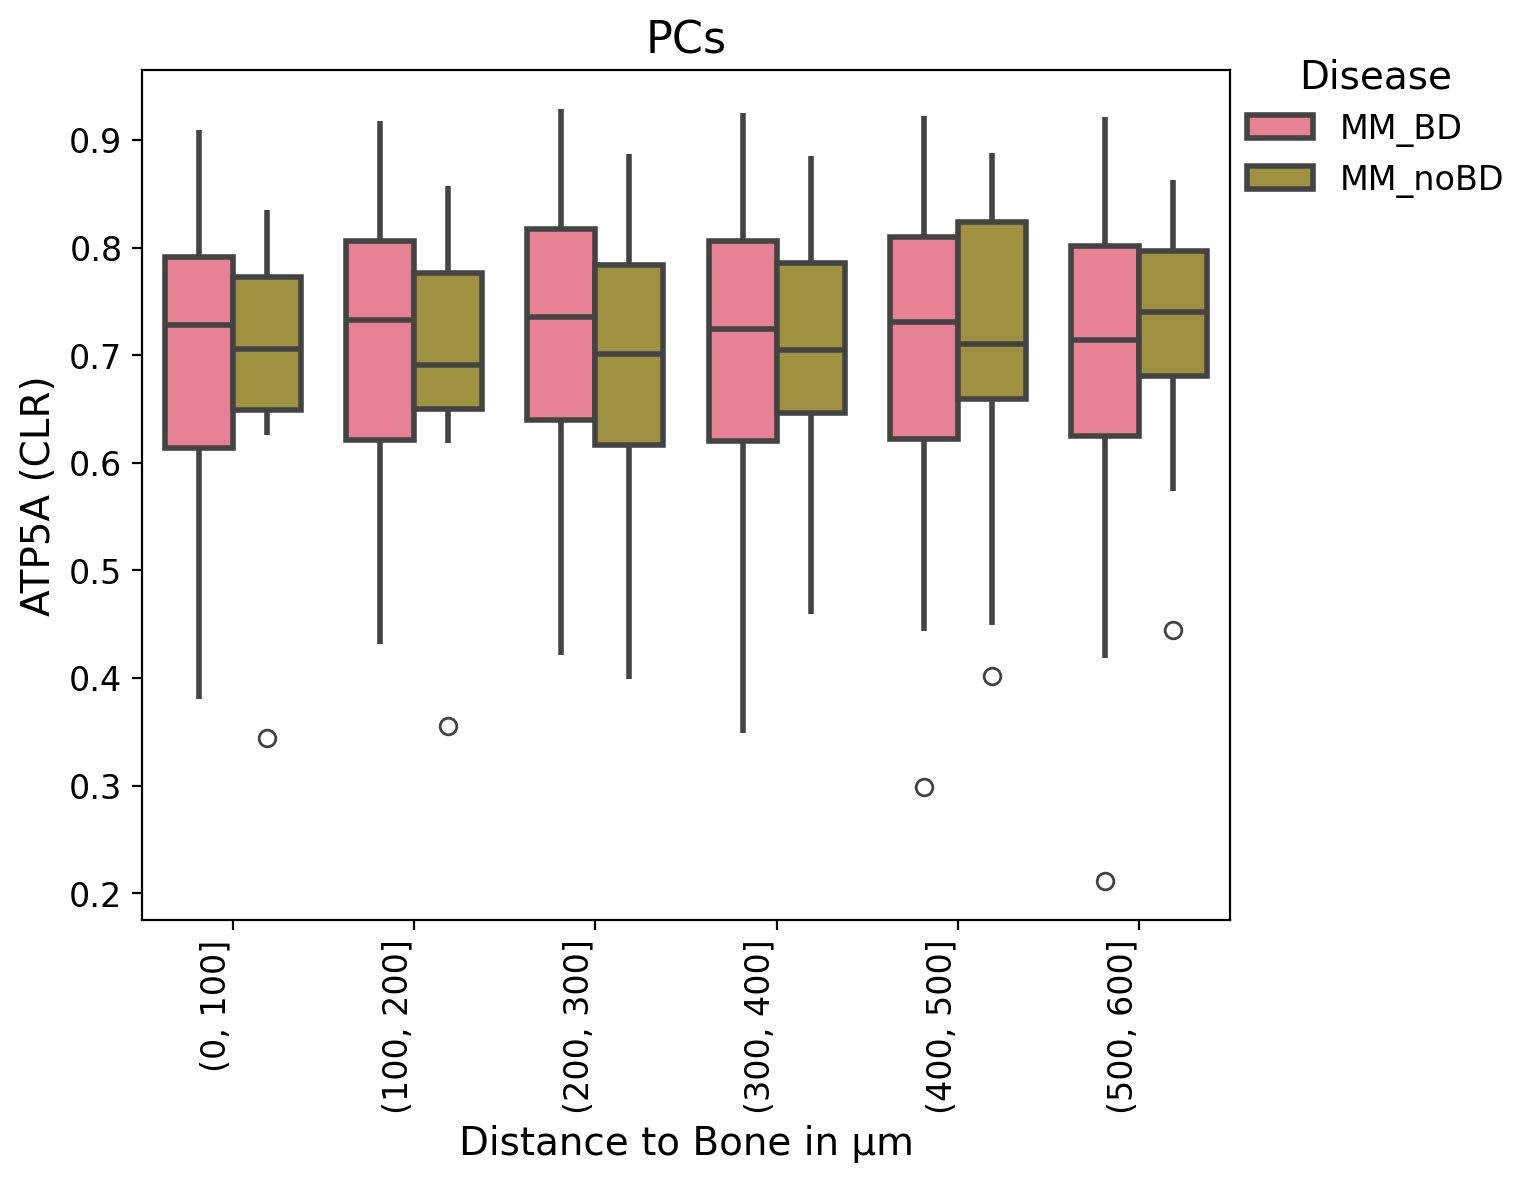

In [92]:
plt.style.use('default')
marker = 'ATP5A'
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x="distance_bin",
    y=marker,
    hue="disease2",
    palette=disease_color_map,
    showcaps=False,
    linewidth=2,
    width=0.75
)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Distance to Bone in µm", fontsize=14)
plt.ylabel(f"{marker} (CLR)", fontsize=14)
plt.legend(title='Disease', loc='upper right', bbox_to_anchor=(1.28, 1.05), framealpha=0, fontsize=12, title_fontsize=14)
plt.title(f"{celltype}", fontsize=16)
plt.tight_layout()
if celltype == 'Plasma Cells/MM cells':
    celltype_file = 'Plasma_Cells_MM_cells'
plt.savefig(os.path.join(save_path, f"{marker}_{celltype}_distance_to_bone_violinplot_perimage.{extension}"))
plt.show()

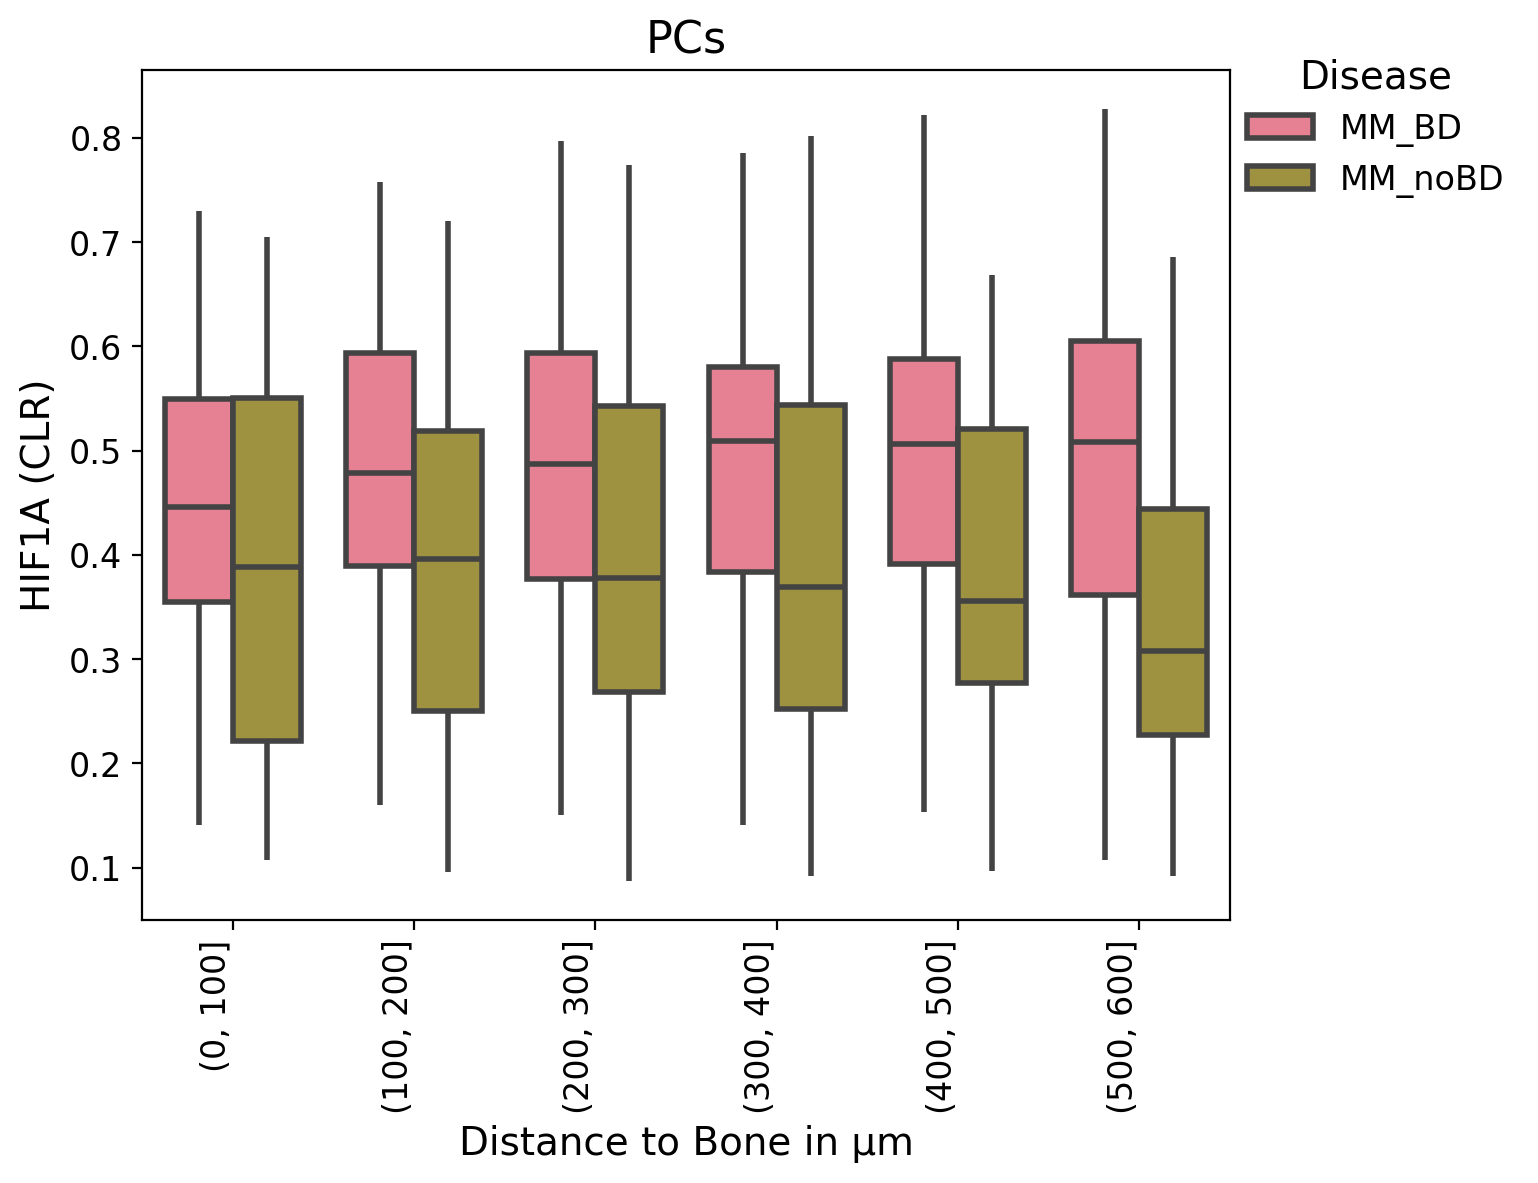

In [93]:
plt.style.use('default')
marker = 'HIF1A'
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x="distance_bin",
    y=marker,
    hue="disease2",
    palette=disease_color_map,
    showcaps=False,
    linewidth=2,
    width=0.75
)
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Distance to Bone in µm", fontsize=14)
plt.ylabel(f"{marker} (CLR)", fontsize=14)
plt.legend(title='Disease', loc='upper right', bbox_to_anchor=(1.28, 1.05), framealpha=0, fontsize=12, title_fontsize=14)
plt.title(f"{celltype}", fontsize=16)
plt.tight_layout()
if celltype == 'Plasma Cells/MM cells':
    celltype_file = 'Plasma_Cells_MM_cells'
plt.savefig(os.path.join(save_path, f"{marker}_{celltype}_distance_to_bone_violinplot_perimage.{extension}"))
plt.show()

In [94]:
bd = df[(df['disease2'] == 'MM_BD') & (df['distance_bin'] == '(0, 100]')]['HIF1A'].values
no_bd = df[(df['disease2'] == 'MM_noBD') & (df['distance_bin'] == '(0, 100]')]['HIF1A'].values
stat, p_value = ttest_ind(bd, no_bd, alternative='greater')
print("T-test statistic:", stat)
print("P-value:", p_value)

T-test statistic: 1.1552103424288933
P-value: 0.1253924505373423


In [95]:
bd = df[(df['disease2'] == 'MM_BD') & (df['distance_bin'] == '(100, 200]')]['HIF1A'].values
no_bd = df[(df['disease2'] == 'MM_noBD') & (df['distance_bin'] == '(100, 200]')]['HIF1A'].values
stat, p_value = ttest_ind(bd, no_bd, alternative='greater')
print("T-test statistic:", stat)
print("P-value:", p_value)

T-test statistic: 1.6895216378883273
P-value: 0.04713324535678155


In [96]:
bd = df[(df['disease2'] == 'MM_BD') & (df['distance_bin'] == '(200, 300]')]['HIF1A'].values
no_bd = df[(df['disease2'] == 'MM_noBD') & (df['distance_bin'] == '(200, 300]')]['HIF1A'].values
stat, p_value = ttest_ind(bd, no_bd, alternative='greater')
print("T-test statistic:", stat)
print("P-value:", p_value)

T-test statistic: 1.5937657560716567
P-value: 0.05708815871086316


In [97]:
bd = df[(df['disease2'] == 'MM_BD') & (df['distance_bin'] == '(300, 400]')]['HIF1A'].values
no_bd = df[(df['disease2'] == 'MM_noBD') & (df['distance_bin'] == '(300, 400]')]['HIF1A'].values
stat, p_value = ttest_ind(bd, no_bd, alternative='greater')
print("T-test statistic:", stat)
print("P-value:", p_value)

T-test statistic: 1.774033657112025
P-value: 0.039614061518492304


In [98]:
bd = df[(df['disease2'] == 'MM_BD') & (df['distance_bin'] == '(400, 500]')]['HIF1A'].values
no_bd = df[(df['disease2'] == 'MM_noBD') & (df['distance_bin'] == '(400, 500]')]['HIF1A'].values
stat, p_value = ttest_ind(bd, no_bd, alternative='greater')
print("T-test statistic:", stat)
print("P-value:", p_value)

T-test statistic: 2.4251602210785776
P-value: 0.008684508608133915


In [99]:
bd = df[(df['disease2'] == 'MM_BD') & (df['distance_bin'] == '(500, 600]')]['HIF1A'].values
no_bd = df[(df['disease2'] == 'MM_noBD') & (df['distance_bin'] == '(500, 600]')]['HIF1A'].values
stat, p_value = ttest_ind(bd, no_bd, alternative='two-sided')
print("T-test statistic:", stat)
print("P-value:", p_value)

T-test statistic: 2.509259739007394
P-value: 0.014317421828040232
